DOMAIN: <br>Semiconductor manufacturing process<br>
• CONTEXT:<br> A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of signals/
variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific
monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. Engineers
typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature
selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors
contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning
and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out
different combinations of features, essential signals that are impacting the yield type can be identified.<br>
• DATA DESCRIPTION: <br>sensor-data.csv : (1567, 592)
The data consists of 1567 examples each with 591 features.
The dataset presented in this case represents a selection of such features where each example represents a single production entity with
associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to
a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.<br>
• PROJECT OBJECTIVE: <br>We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the
features are required to build the model or not.

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
Data = pd.read_csv('signal-data.csv')

In [3]:
Data.shape
# We can see that we have huge number of features

(1567, 592)

In [4]:
Data.head()
# We can see that datset contains null values, also we have columns with same value

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.6972  

In [5]:
Data.isnull().sum().sum()
# we can see that total of 41951 data is missing in entire data set

41951

In [6]:
Data.info()
# We can see that we have float64(590), int64(1), object(1) data types in our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [7]:
Data.isnull().sum()

Time            0
0               6
1               7
2              14
3              14
4              14
5              14
6              14
7               9
8               2
9               2
10              2
11              2
12              2
13              3
14              3
15              3
16              3
17              3
18              3
19             10
20              0
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              1
33              1
34              1
35              1
36              1
37              1
38              1
39              1
40             24
41             24
42              1
43              1
44              1
45              1
46              1
47              1
48              1
49              1
50              1
51              1
52              1
53              4
54        

In [8]:
# We can see that many columns have too many null values, so columns which have null values more than 70% can be droppped
# as majority of the data is missing imputing and creating majority of the artificial data is of no use in above case
# SO columns having null values more than roughly 1000 can be dropped
counter  = 0

for columns in Data.columns:
    if Data[columns].isnull().sum() >= 1000:
        counter = counter + 1
        print( columns , 'Column has', Data[columns].isnull().sum() , ' null values, hence can be dropped')
        del Data[columns]
        

print('New shape of the data set after deleting above', counter ,' columns is', Data.shape)

85 Column has 1341  null values, hence can be dropped
109 Column has 1018  null values, hence can be dropped
110 Column has 1018  null values, hence can be dropped
111 Column has 1018  null values, hence can be dropped
157 Column has 1429  null values, hence can be dropped
158 Column has 1429  null values, hence can be dropped
220 Column has 1341  null values, hence can be dropped
244 Column has 1018  null values, hence can be dropped
245 Column has 1018  null values, hence can be dropped
246 Column has 1018  null values, hence can be dropped
292 Column has 1429  null values, hence can be dropped
293 Column has 1429  null values, hence can be dropped
358 Column has 1341  null values, hence can be dropped
382 Column has 1018  null values, hence can be dropped
383 Column has 1018  null values, hence can be dropped
384 Column has 1018  null values, hence can be dropped
492 Column has 1341  null values, hence can be dropped
516 Column has 1018  null values, hence can be dropped
517 Column 

In [9]:
# we wont be requiring time column to classify condutor into pass or fail category, hence we can drop time column too
Data.drop(labels = 'Time', axis = 1, inplace = True)
Data.shape

(1567, 571)

In [10]:
Data.describe().T

count         mean          std         min          25%  \
0          1561.0  3014.452896    73.621787   2743.2400  2966.260000   
1          1560.0  2495.850231    80.407705   2158.7500  2452.247500   
2          1553.0  2200.547318    29.513152   2060.6600  2181.044400   
3          1553.0  1396.376627   441.691640      0.0000  1081.875800   
4          1553.0     4.197013    56.355540      0.6815     1.017700   
5          1553.0   100.000000     0.000000    100.0000   100.000000   
6          1553.0   101.112908     6.237214     82.1311    97.920000   
7          1558.0     0.121822     0.008961      0.0000     0.121100   
8          1565.0     1.462862     0.073897      1.1910     1.411200   
9          1565.0    -0.000841     0.015116     -0.0534    -0.010800   
10         1565.0     0.000146     0.009302     -0.0349    -0.005600   
11         1565.0     0.964353     0.012452      0.6554     0.958100   
12         1565.0   199.956809     3.257276    182.0940   198.130700   
13         1564.0     0.000000     0.000000      0.0000     0.000000   
14         1564.0     9.005371     2.796596      2.2493     7.094875   
15         1564.0   413.086035    17.221095    333.4486   406.127400   
16         1564.0     9.907603     2.403867      4.4696     9.567625   
17         1564.0     0.971444     0.012062      0.5794     0.968200   
18         1564.0   190.047354     2.781041    169.1774   188.299825   
19         1557.0    12.481034     0.217965      9.8773    12.460000   
20         1567.0     1.405054     0.016737      1.1797     1.396500   
21         1565.0 -5618.393610   626.822178  -7150.2500 -5933.250000   
22         1565.0  2699.378435   295.498535      0.0000  2578.000000   
23         1565.0 -3806.299734  1380.162148  -9986.7500 -4371.750000   
24         1565.0  -298.598136  2902.690117 -14804.5000 -1476.000000   
25         1565.0     1.203845     0.177600      0.0000     1.094800   
26         1565.0     1.938477     0.189495      0.0000     1.906500   
27         1565.0     6.638628     1.244249      0.0000     5.263700   
28         1565.0    69.499532     3.461181     59.4000    67.377800   
29         1565.0     2.366197     0.408694      0.6667     2.088900   
30         1565.0     0.184159     0.032944      0.0341     0.161700   
31         1565.0     3.673189     0.535322      2.0698     3.362700   
32         1566.0    85.337469     2.026549     83.1829    84.490500   
33         1566.0     8.960279     1.344456      7.6032     8.580000   
34         1566.0    50.582639     1.182618     49.8348    50.252350   
35         1566.0    64.555787     2.574749     63.6774    64.024800   
36         1566.0    49.417370     1.182619     40.2289    49.421200   
37         1566.0    66.221274     0.304141     64.9193    66.040650   
38         1566.0    86.836577     0.446756     84.7327    86.578300   
39         1566.0   118.679554     1.807221    111.7128   118.015600   
40         1543.0    67.904909    24.062943      1.4340    74.800000   
41         1543.0     3.353066     2.360425     -0.0759     2.690000   
42         1566.0    70.000000     0.000000     70.0000    70.000000   
43         1566.0   355.538904     6.234706    342.7545   350.801575   
44         1566.0    10.031165     0.175038      9.4640     9.925425   
45         1566.0   136.743060     7.849247    108.8464   130.728875   
46         1566.0   733.672811    12.170315    699.8139   724.442300   
47         1566.0     1.177958     0.189637      0.4967     0.985000   
48         1566.0   139.972231     4.524251    125.7982   136.926800   
49         1566.0     1.000000     0.000000      1.0000     1.000000   
50         1566.0   632.254197     8.643985    607.3927   625.928425   
51         1566.0   157.420991    60.925108     40.2614   115.508975   
52         1566.0     0.000000     0.000000      0.0000     0.000000   
53         1563.0     4.592971     0.054950      3.7060     4.574000   
54         1563.0     4.838523     0.059581      3.9

In [11]:
# We can see that manu columns have same values across all rows, such columns wont support in creating our model, 
# hence such columns can be dropped too
counter  = 0
for columns in Data.columns:
    if Data[columns].min() == Data[columns].median() and Data[columns].max() == Data[columns].median():
        counter = counter + 1
        print( columns , 'Column has single value ', Data[columns].median(), ', hence can be dropped')
        del Data[columns]
        

print('New shape of the data set after deleting above', counter ,' columns is', Data.shape)

5 Column has single value  100.0 , hence can be dropped
13 Column has single value  0.0 , hence can be dropped
42 Column has single value  70.0 , hence can be dropped
49 Column has single value  1.0 , hence can be dropped
52 Column has single value  0.0 , hence can be dropped
69 Column has single value  1.0 , hence can be dropped
97 Column has single value  0.0 , hence can be dropped
141 Column has single value  0.0 , hence can be dropped
149 Column has single value  0.0 , hence can be dropped
178 Column has single value  0.0 , hence can be dropped
179 Column has single value  0.0 , hence can be dropped
186 Column has single value  0.0 , hence can be dropped
189 Column has single value  0.0 , hence can be dropped
190 Column has single value  0.0 , hence can be dropped
191 Column has single value  0.0 , hence can be dropped
192 Column has single value  0.0 , hence can be dropped
193 Column has single value  0.0 , hence can be dropped
194 Column has single value  0.0 , hence can be dropp

In [12]:
#Lets see if we have features with very less variance, if we have any then we can drop those features too, 
# since column haveing very low variance won't be helpfull in building our model 
Data.var(axis = 0, skipna = True)

0            5.420167e+03
1            6.465399e+03
2            8.710261e+02
3            1.950915e+05
4            3.175947e+03
6            3.890284e+01
7            8.030522e-05
8            5.460702e-03
9            2.284992e-04
10           8.652916e-05
11           1.550536e-04
12           1.060984e+01
14           7.820947e+00
15           2.965661e+02
16           5.778575e+00
17           1.455018e-04
18           7.734187e+00
19           4.750885e-02
20           2.801249e-04
21           3.929060e+05
22           8.731938e+04
23           1.904848e+06
24           8.425610e+06
25           3.154193e-02
26           3.590837e-02
27           1.548156e+00
28           1.197977e+01
29           1.670310e-01
30           1.085303e-03
31           2.865695e-01
32           4.106902e+00
33           1.807563e+00
34           1.398586e+00
35           6.629330e+00
36           1.398587e+00
37           9.250163e-02
38           1.995906e-01
39           3.266047e+00
40          

In [13]:
#We can see that we have many features with very low variance,
#lets get rid of such features which has variance less than 10%
counter  = 0
for columns in Data.columns[:454]: # leaving the last column
    if Data[columns].var() <=10:
        counter = counter + 1
        print( columns , 'Column has variance of ', Data[columns].var(), 'which is very low, hence can be dropped')
        del Data[columns]
        

print('New shape of the data set after deleting above', counter ,' columns is', Data.shape)

7 Column has variance of  8.030522137796683e-05 which is very low, hence can be dropped
8 Column has variance of  0.0054607018028647765 which is very low, hence can be dropped
9 Column has variance of  0.00022849918565487037 which is very low, hence can be dropped
10 Column has variance of  8.652915872302494e-05 which is very low, hence can be dropped
11 Column has variance of  0.00015505359361185774 which is very low, hence can be dropped
14 Column has variance of  7.820946786353919 which is very low, hence can be dropped
16 Column has variance of  5.778574796383628 which is very low, hence can be dropped
17 Column has variance of  0.0001455017992932797 which is very low, hence can be dropped
18 Column has variance of  7.734187455719755 which is very low, hence can be dropped
19 Column has variance of  0.04750885460969863 which is very low, hence can be dropped
20 Column has variance of  0.00028012491013976854 which is very low, hence can be dropped
25 Column has variance of  0.031541

181 Column has variance of  0.050356146480114584 which is very low, hence can be dropped
184 Column has variance of  0.01214353542877193 which is very low, hence can be dropped
195 Column has variance of  0.15617273678118296 which is very low, hence can be dropped
198 Column has variance of  0.28912687634816603 which is very low, hence can be dropped
206 Column has variance of  0.002562459961563105 which is very low, hence can be dropped
209 Column has variance of  1.3643962203715427 which is very low, hence can be dropped
210 Column has variance of  0.0017694254949636586 which is very low, hence can be dropped
211 Column has variance of  0.0006252572111363548 which is very low, hence can be dropped
212 Column has variance of  0.0009971475888599435 which is very low, hence can be dropped
213 Column has variance of  0.002812134652760093 which is very low, hence can be dropped
214 Column has variance of  0.003187242900736602 which is very low, hence can be dropped
215 Column has variance

407 Column has variance of  0.13301421099402128 which is very low, hence can be dropped
408 Column has variance of  6.646690706388391 which is very low, hence can be dropped
409 Column has variance of  3.157171928805614 which is very low, hence can be dropped
410 Column has variance of  4.50703532970221 which is very low, hence can be dropped
411 Column has variance of  0.30412375911765377 which is very low, hence can be dropped
416 Column has variance of  1.0721218245803485 which is very low, hence can be dropped
420 Column has variance of  9.34948205353655 which is very low, hence can be dropped
426 Column has variance of  0.991259320665041 which is very low, hence can be dropped
427 Column has variance of  9.254643130984583 which is very low, hence can be dropped
437 Column has variance of  2.5962028463559714 which is very low, hence can be dropped
441 Column has variance of  0.033934322921996614 which is very low, hence can be dropped
442 Column has variance of  0.43453746523763026

In [14]:
# Now lets check how much null values do we have in our data set
Data.isnull().sum()

0              6
1              7
2             14
3             14
4             14
6             14
12             2
15             3
21             2
22             2
23             2
24             2
28             2
40            24
43             1
45             1
46             1
48             1
50             1
51             1
55             4
59             7
60             6
62             6
63             7
64             7
65             7
66             6
67             6
68             6
70             6
71             6
72           794
73           794
88             0
90            51
115            0
117            0
133            8
135            5
136            6
137            7
138           14
139           14
140           14
142           14
148            2
150            3
151            3
152            3
154            3
159            2
160            2
161            2
162            2
180            1
182            1
183            1
185           

In [15]:
Data.isna().sum().sum()
# so we have total of 7585 null values across 183 columns

7585

In [16]:
# Since we do not have domain expertise on each particular feature, we will fill the null values with the mean value 

#Replace blank valus with Nan values
Data = Data.replace('', np.nan)

#Replace the Null value with the mean value of each column
for columns in Data.columns:
    mean = Data[columns].mean()
    Data[columns] = Data[columns].fillna(mean)

In [17]:
#Lets check null values again
Data.isnull().sum().sum()

0

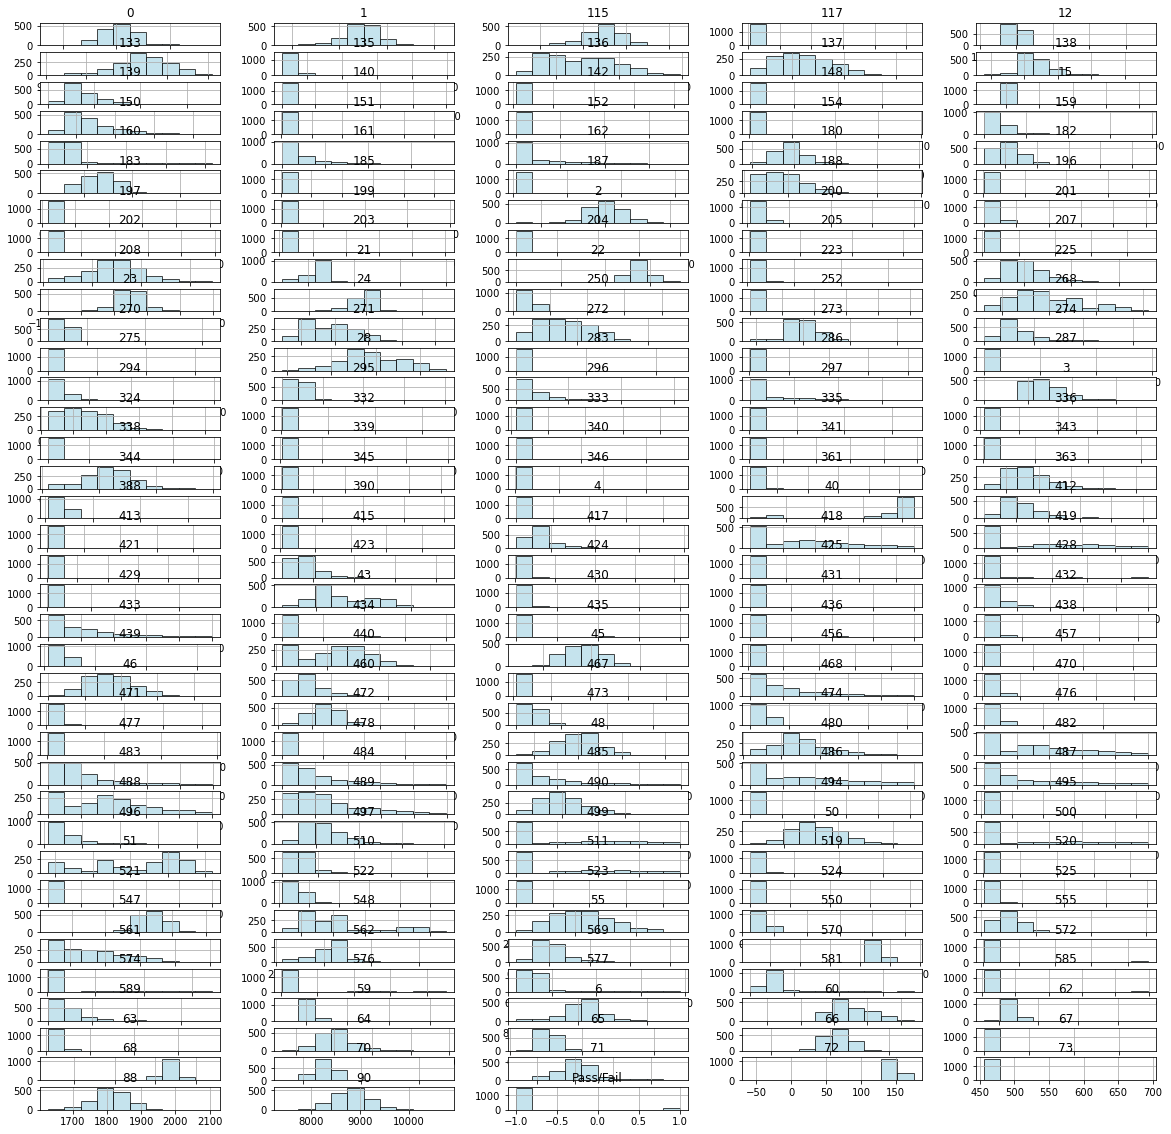

In [18]:
# now that we have our base data ready, lets perform Data analysis & visualisation
#Lets check the distribution of each feature
Data.hist(color='lightblue', edgecolor = 'black', alpha = 0.7, figsize = (20,20), layout=(37,5))
plt.tight_layout()
plt.show()

In [19]:
Data.skew()
# We can see that except for below mentioned columns rest all columns are highly skewed

0             0.514641
1            -0.043163
2            -0.307136
3             1.719310
4            19.733442
6            -0.107427
12            7.209324
15           17.076921
21            2.376138
22           -2.182923
23            0.356874
24           -0.054125
28           -0.063702
40           -1.882466
43            0.554674
45            0.374818
46            0.337946
48           -0.019920
50            0.389282
51           -0.509794
55            0.368893
59            4.730023
60            0.314994
62            5.307243
63           10.706091
64            1.130865
65            3.333722
66           -0.204512
67           20.824463
68           -2.902413
70            0.758319
71            1.254421
72           -9.774366
73           14.111827
88           -0.272824
90            0.347334
115          -0.271651
117          38.005963
133          -0.277546
135           6.192576
136           0.333026
137           0.384090
138           0.823306
139        

In [20]:
for columns in Data.columns:
    if Data[columns].skew() <= 0.5 and Data[columns].skew() >= -0.5:
        print( columns , 'column is close to normal distribution with', Data[columns].skew(), 'skewness') 

1 column is close to normal distribution with -0.04316264649515132 skewness
2 column is close to normal distribution with -0.3071360279896156 skewness
6 column is close to normal distribution with -0.10742686096931855 skewness
23 column is close to normal distribution with 0.35687433333104274 skewness
24 column is close to normal distribution with -0.05412523101217642 skewness
28 column is close to normal distribution with -0.06370154039777466 skewness
45 column is close to normal distribution with 0.3748180652355466 skewness
46 column is close to normal distribution with 0.33794574731566174 skewness
48 column is close to normal distribution with -0.019919872092288217 skewness
50 column is close to normal distribution with 0.38928231336840213 skewness
55 column is close to normal distribution with 0.3688928821847343 skewness
60 column is close to normal distribution with 0.3149941060125438 skewness
66 column is close to normal distribution with -0.2045121899230426 skewness
88 column is

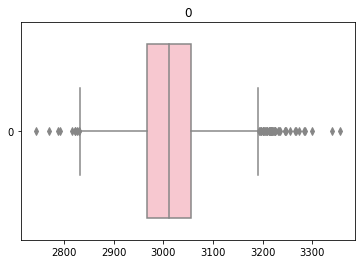

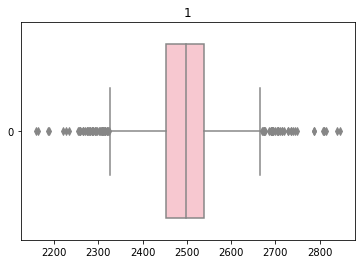

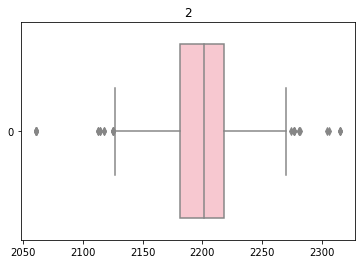

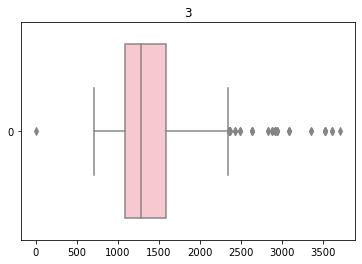

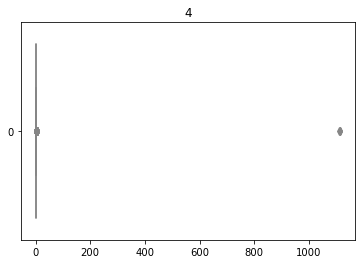

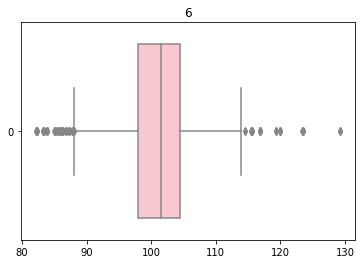

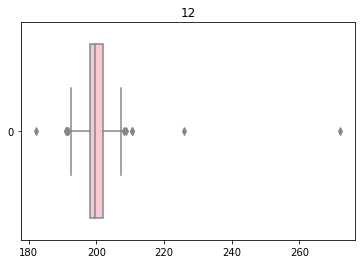

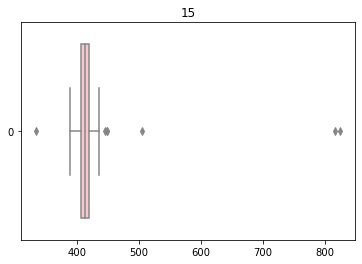

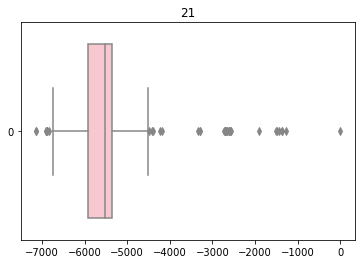

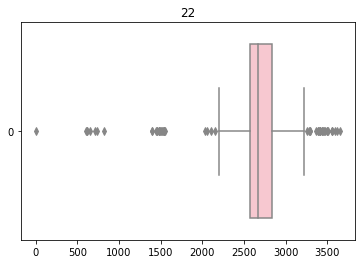

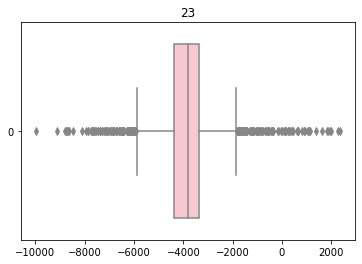

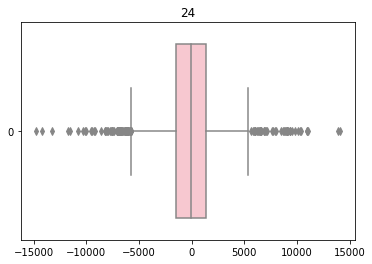

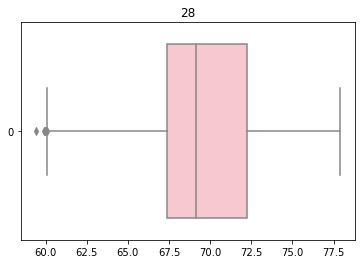

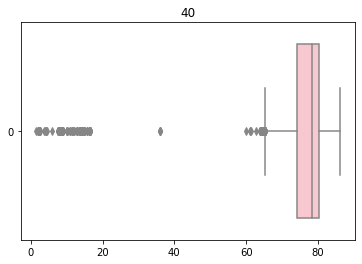

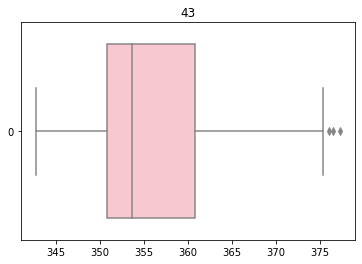

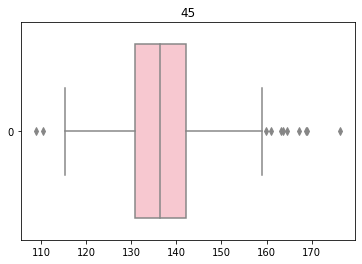

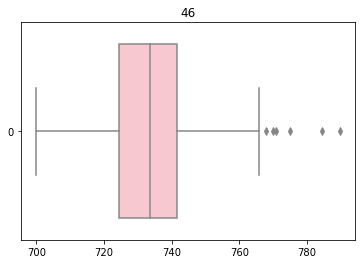

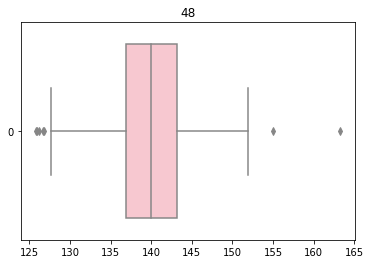

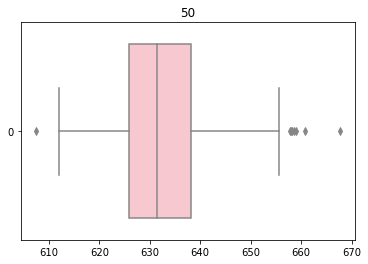

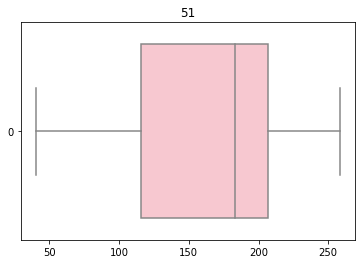

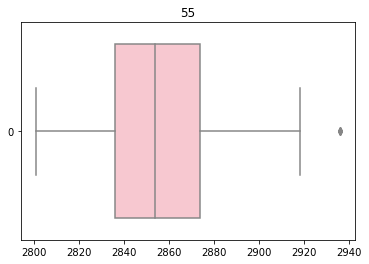

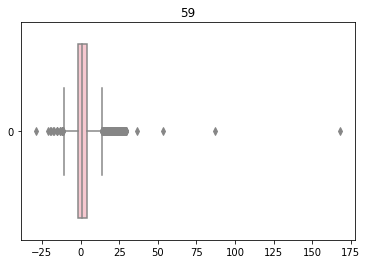

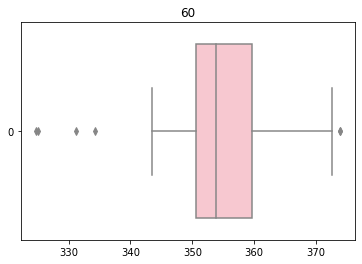

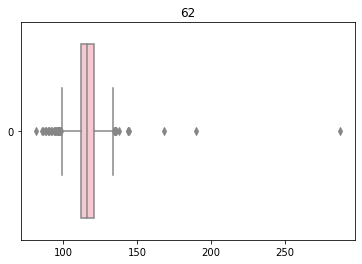

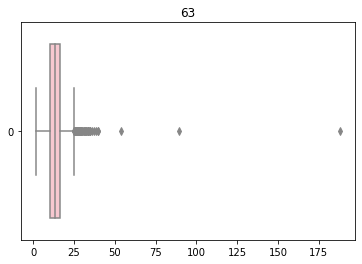

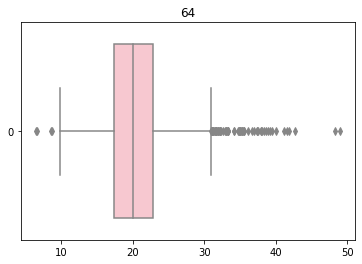

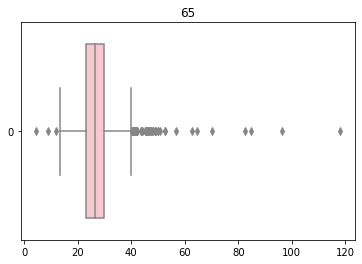

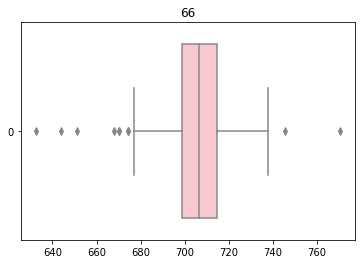

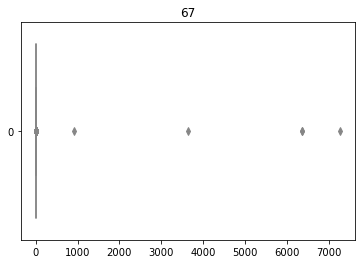

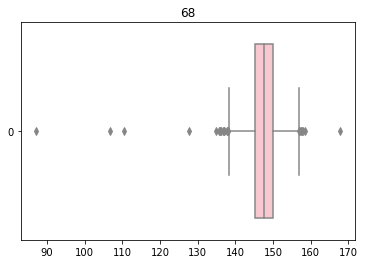

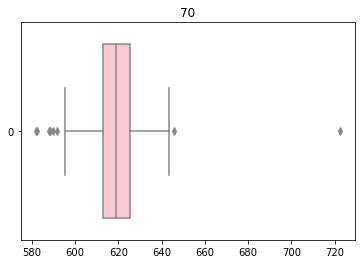

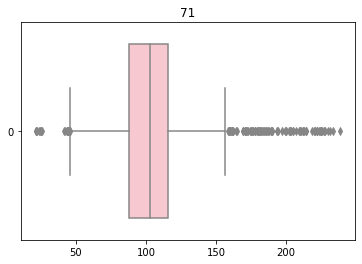

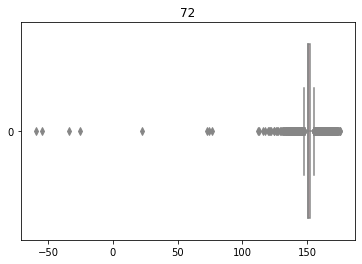

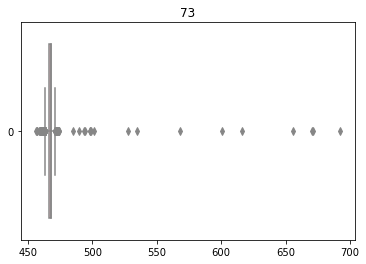

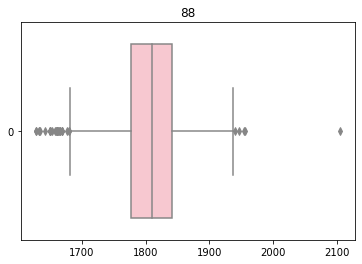

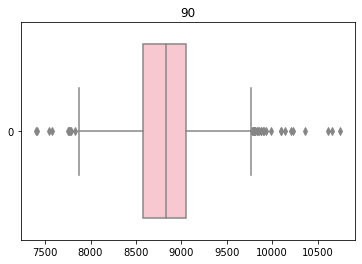

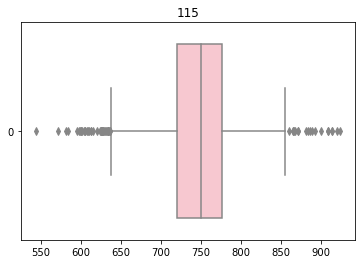

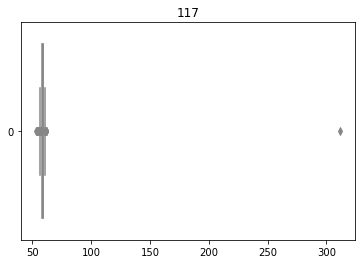

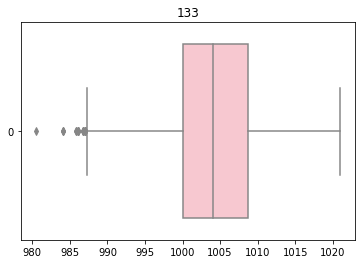

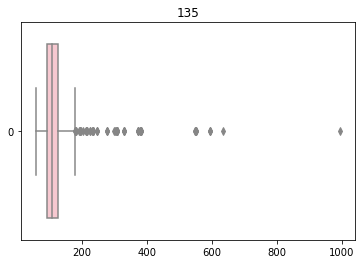

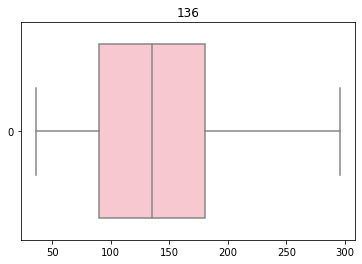

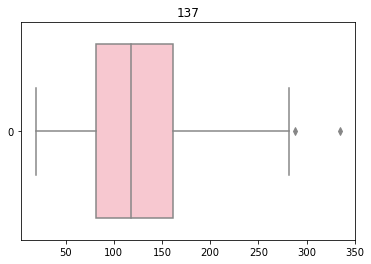

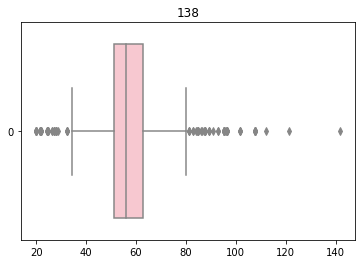

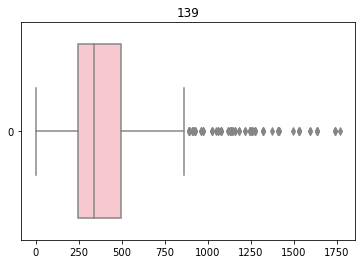

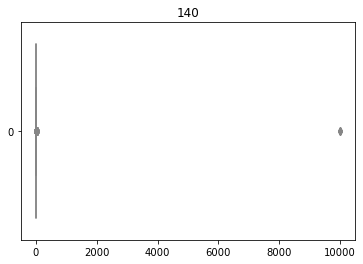

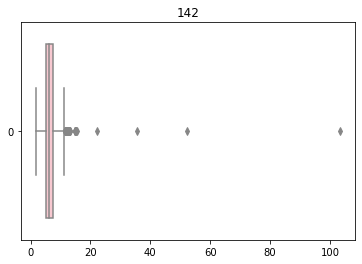

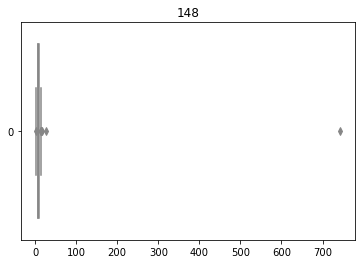

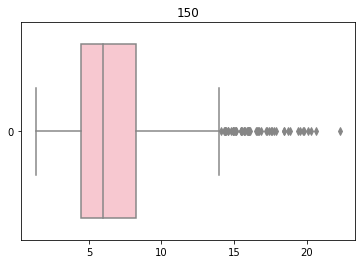

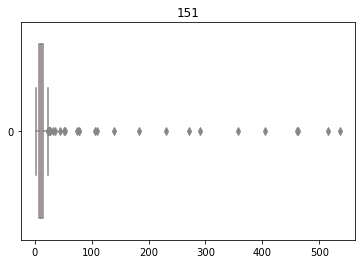

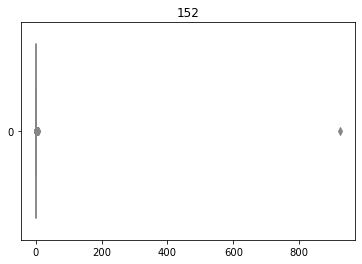

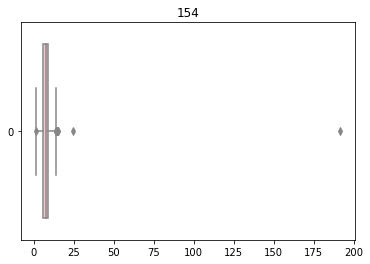

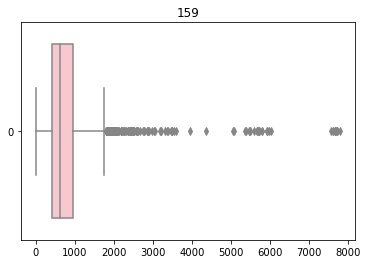

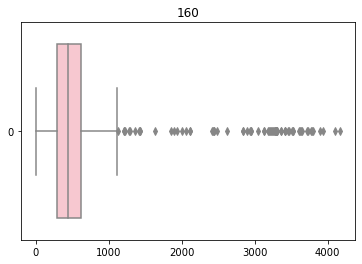

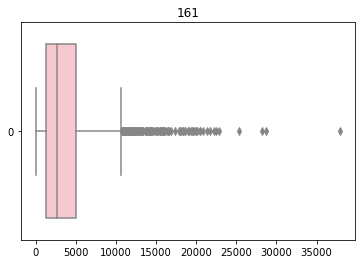

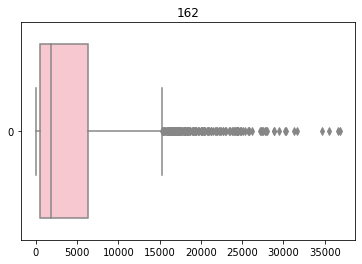

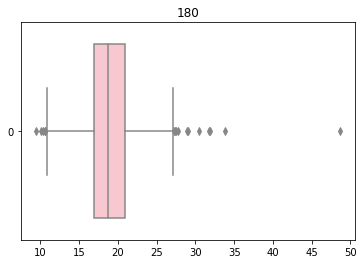

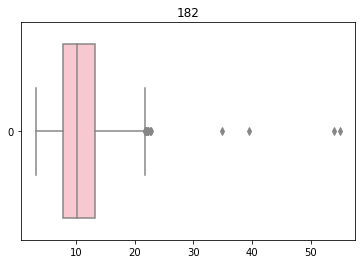

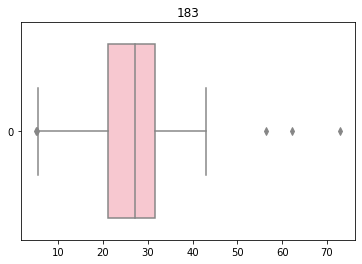

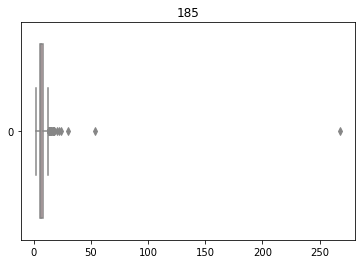

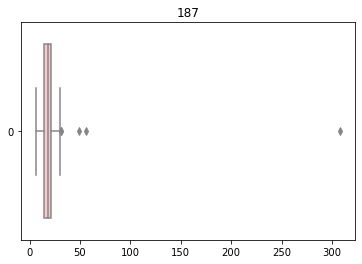

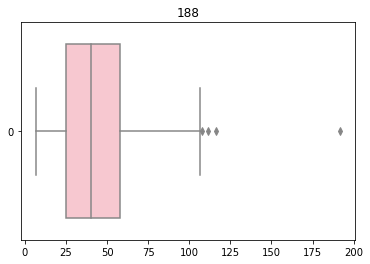

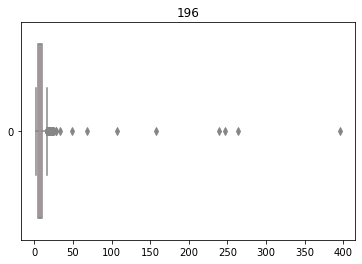

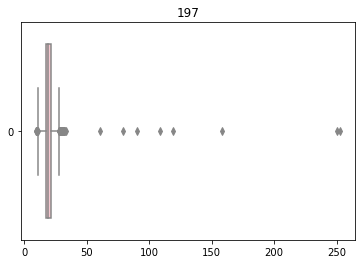

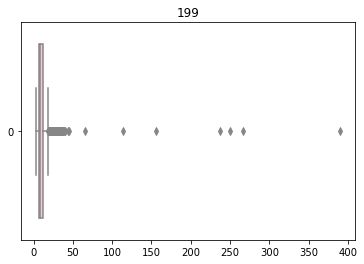

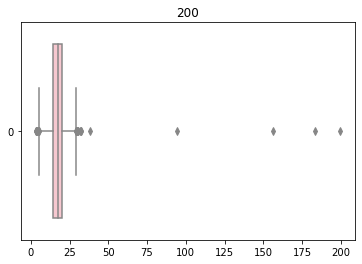

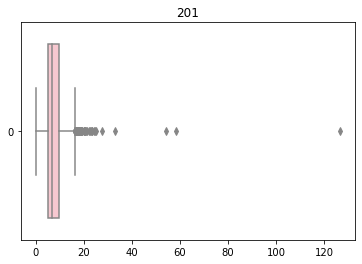

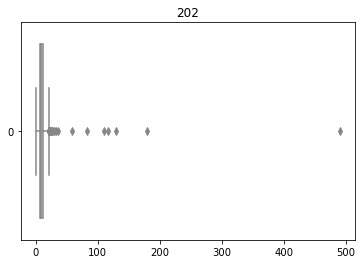

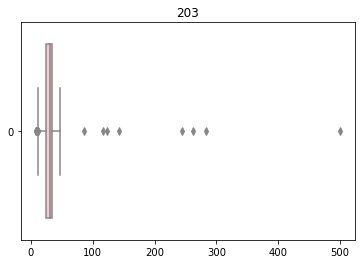

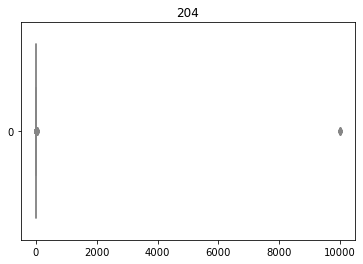

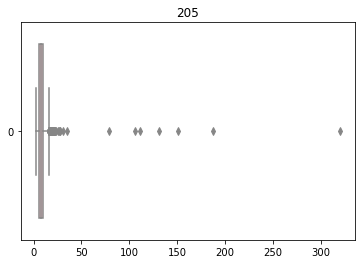

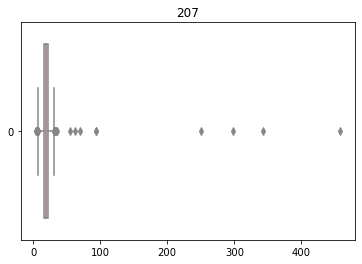

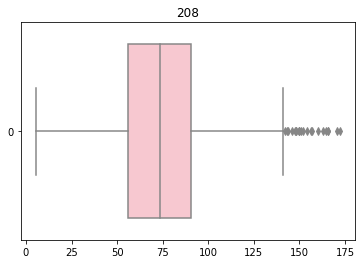

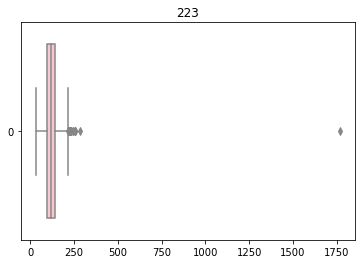

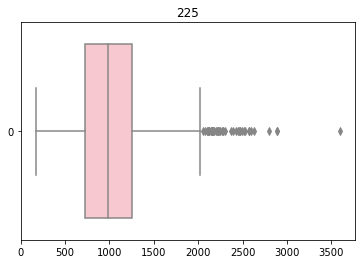

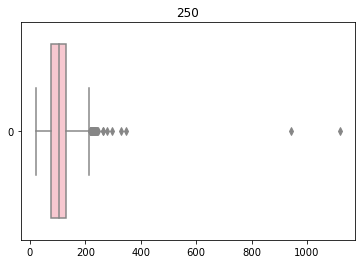

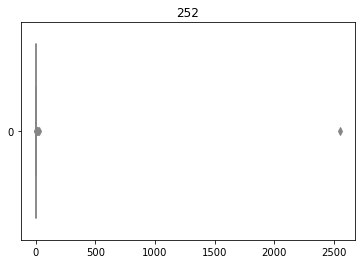

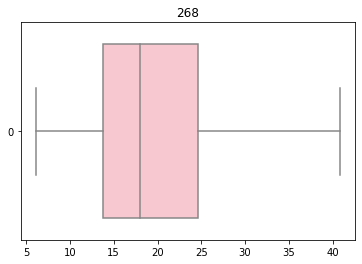

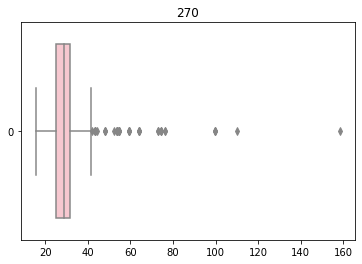

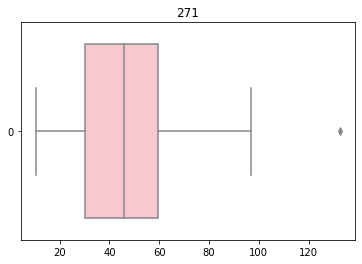

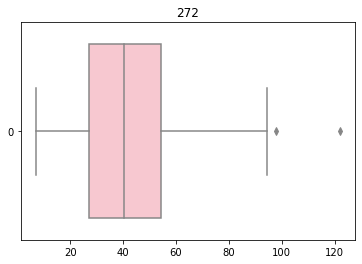

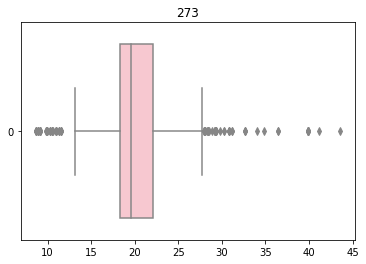

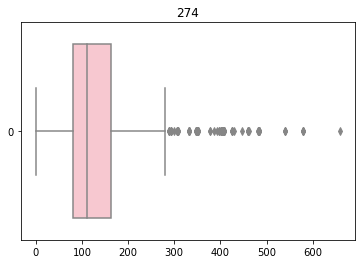

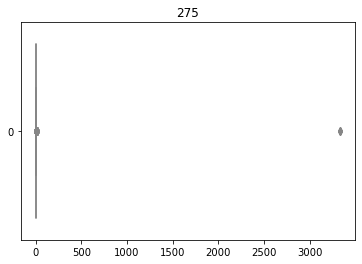

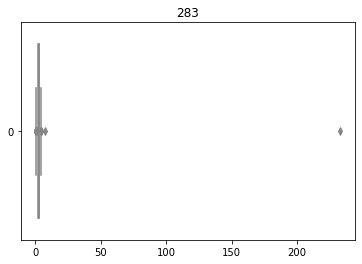

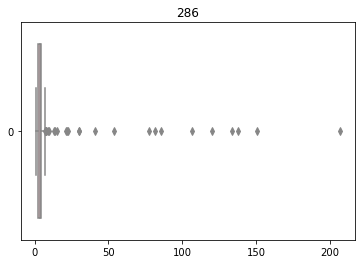

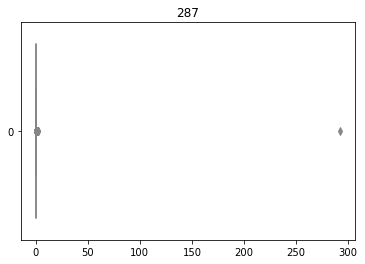

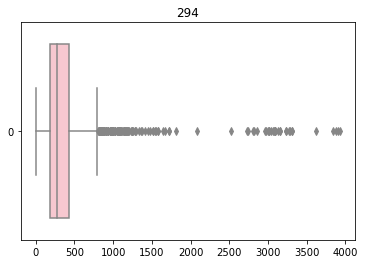

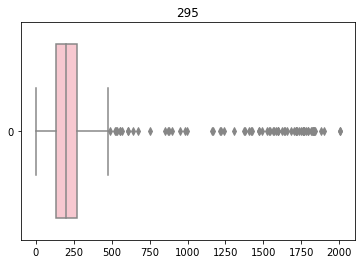

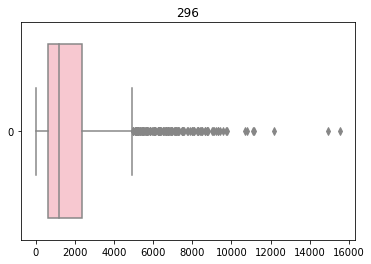

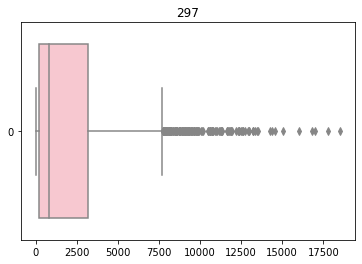

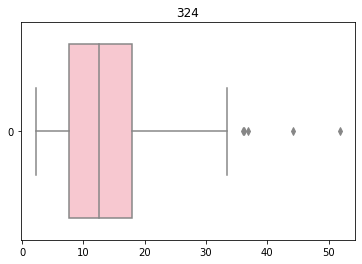

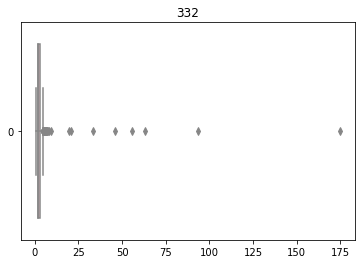

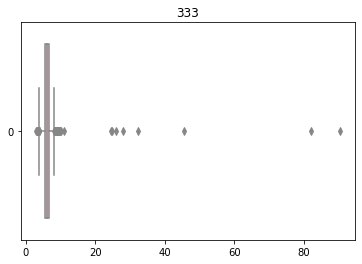

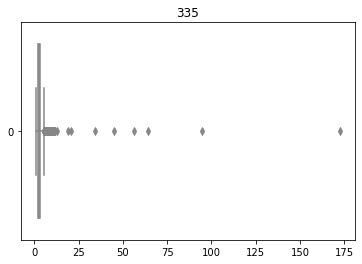

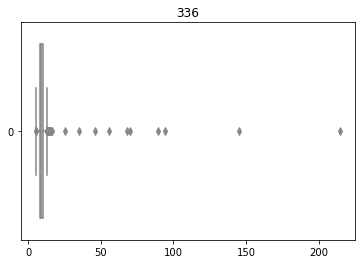

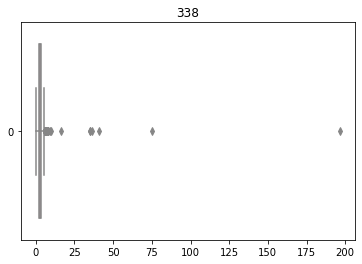

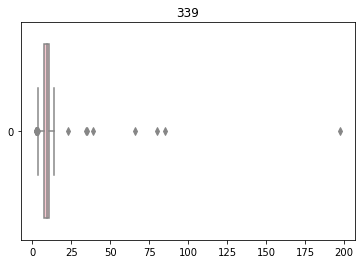

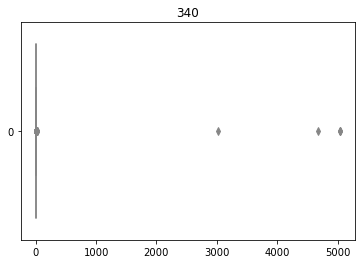

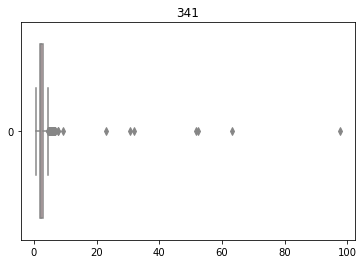

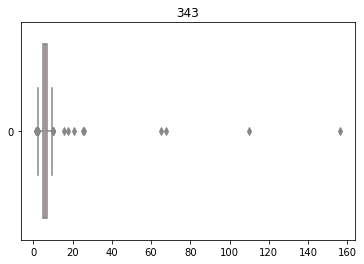

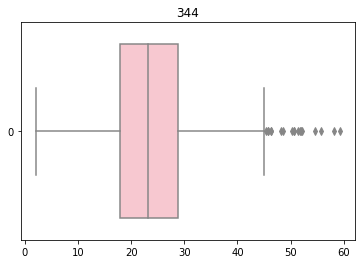

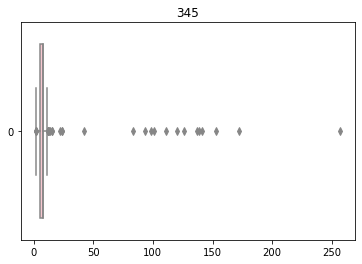

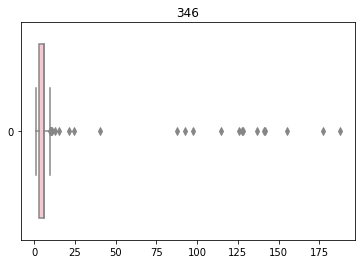

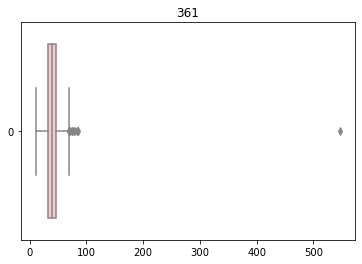

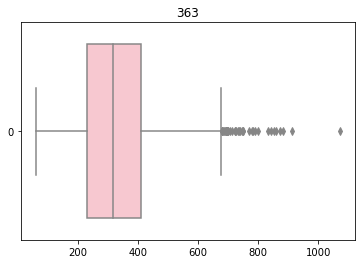

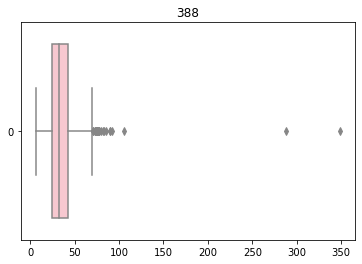

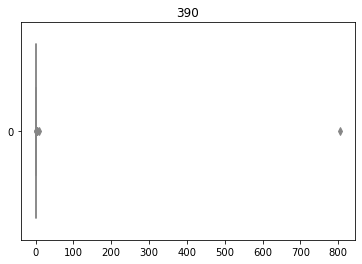

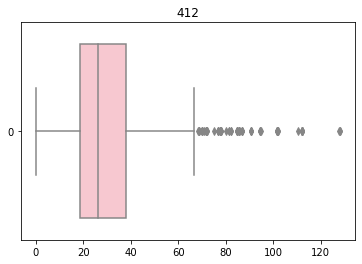

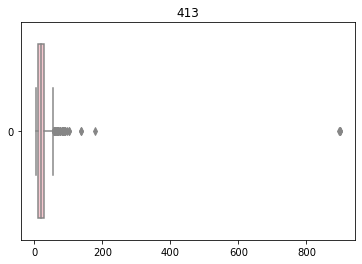

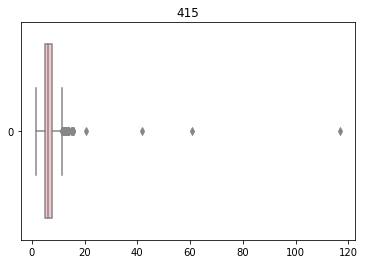

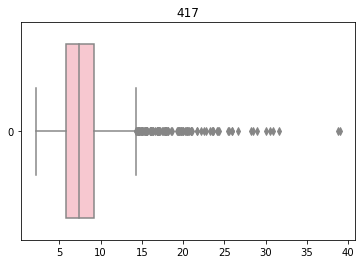

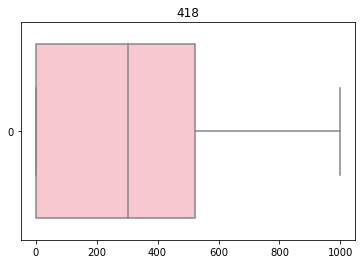

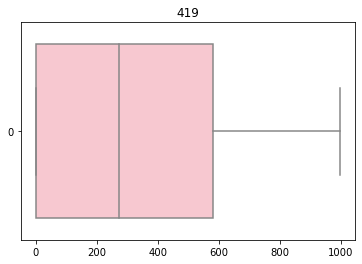

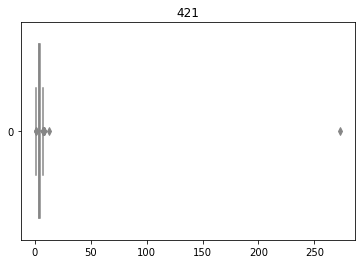

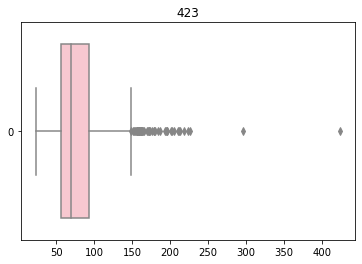

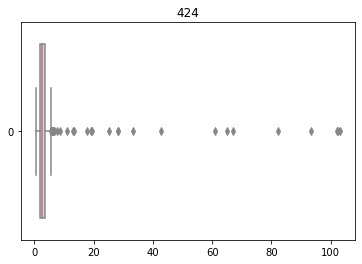

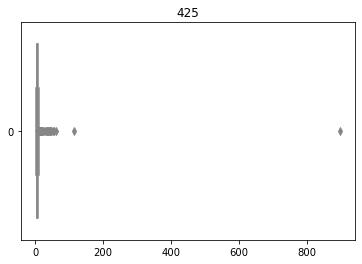

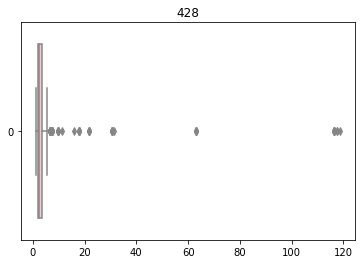

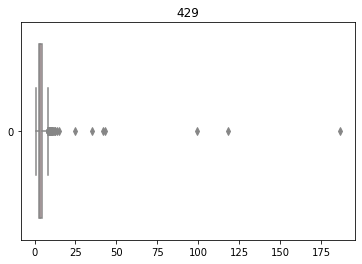

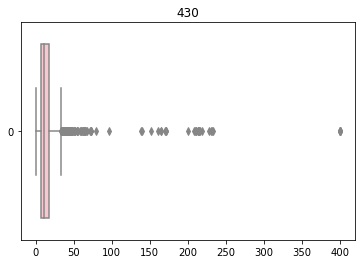

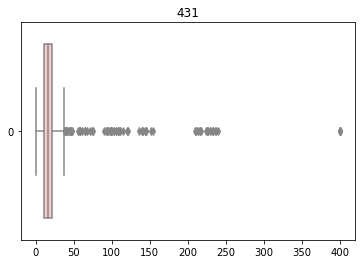

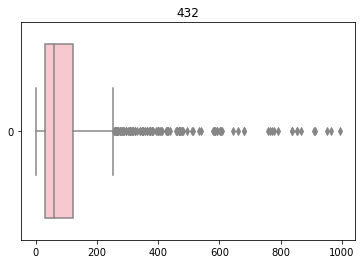

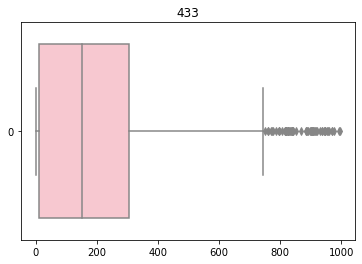

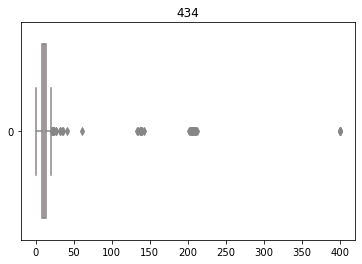

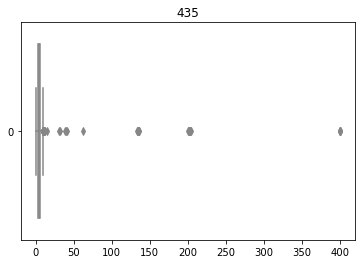

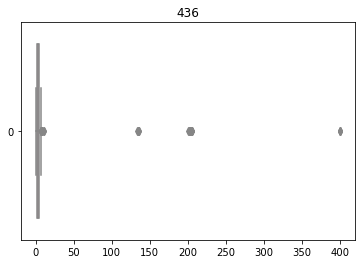

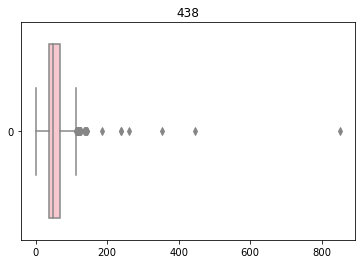

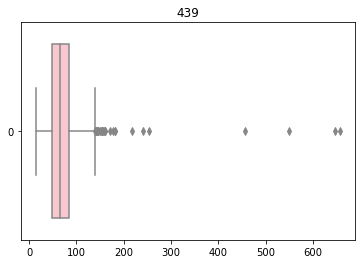

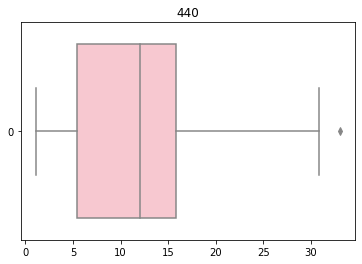

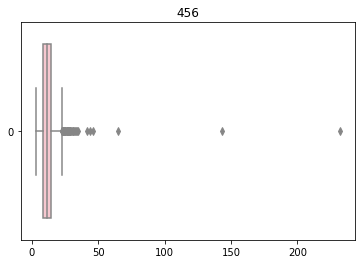

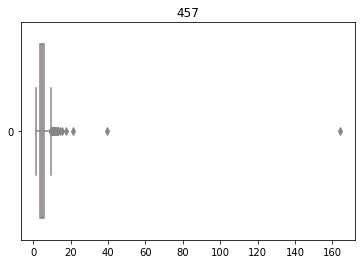

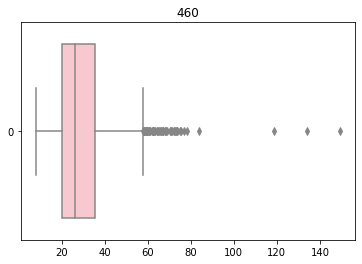

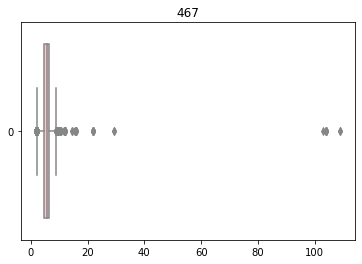

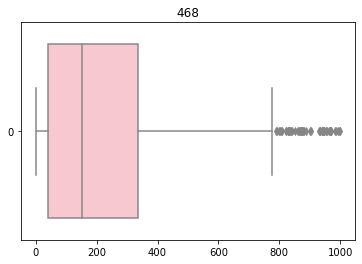

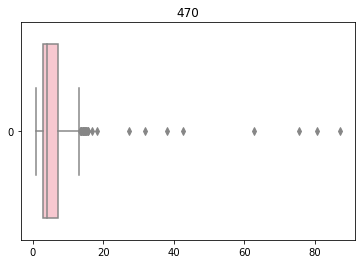

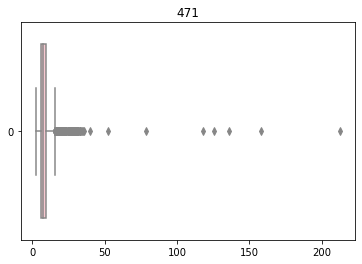

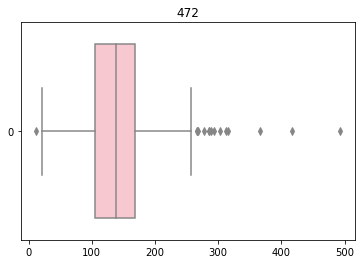

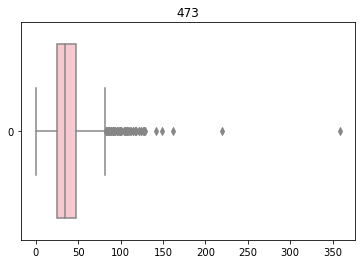

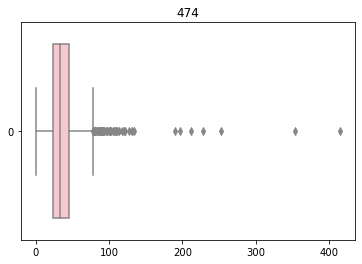

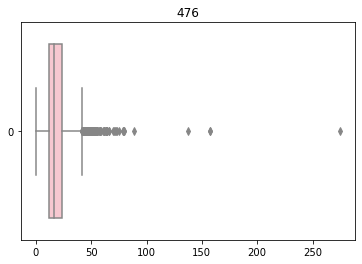

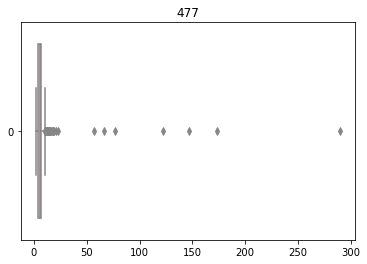

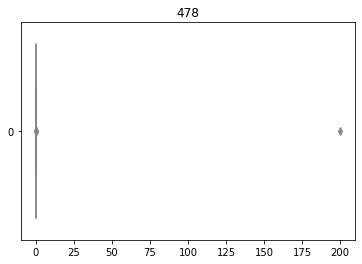

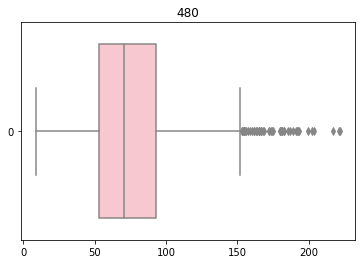

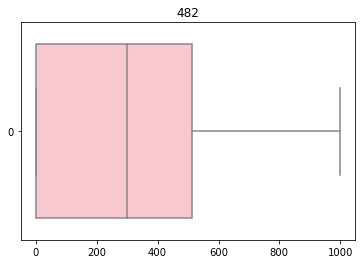

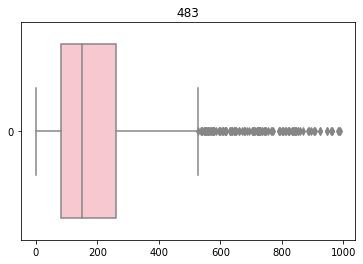

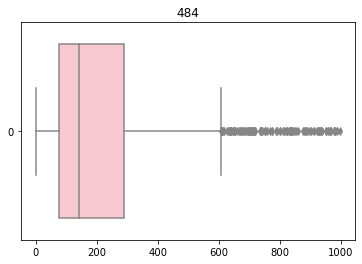

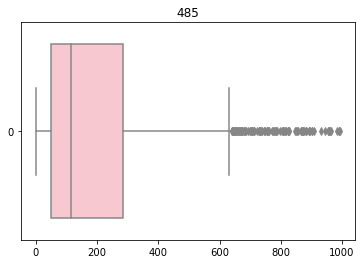

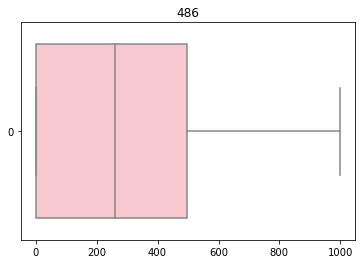

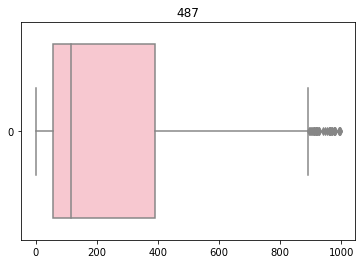

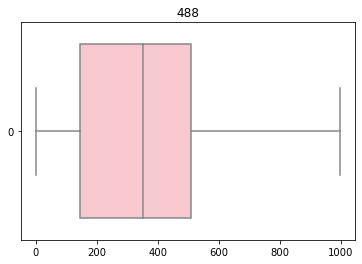

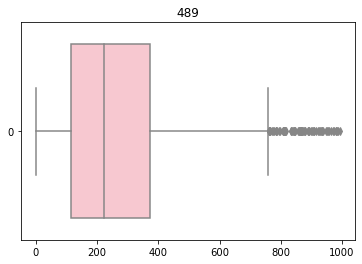

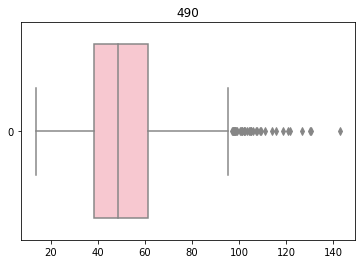

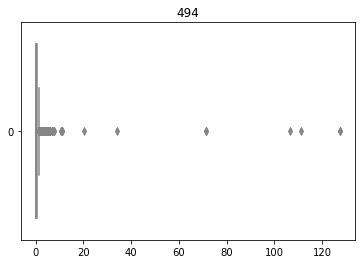

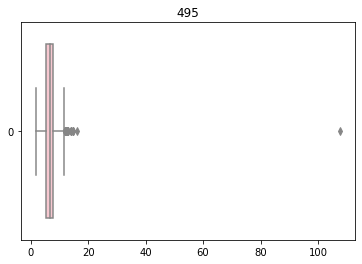

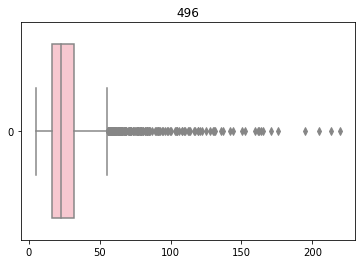

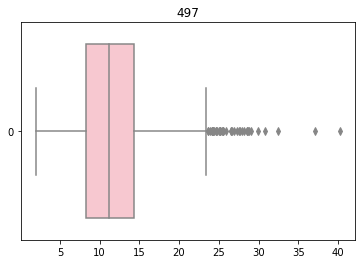

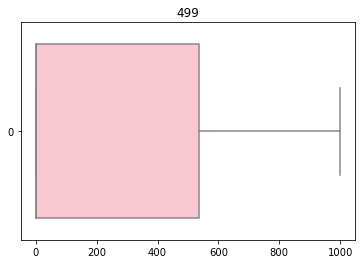

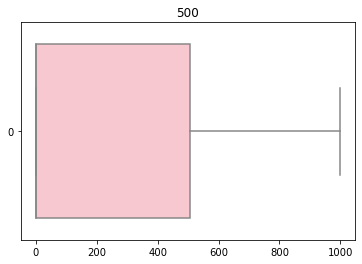

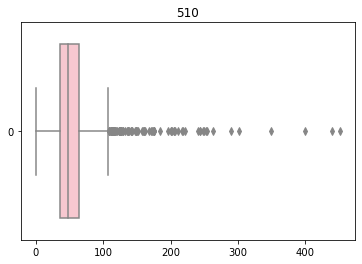

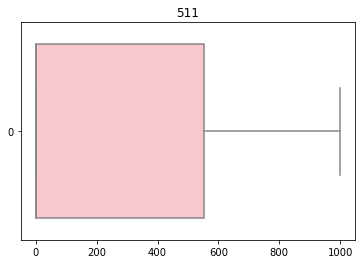

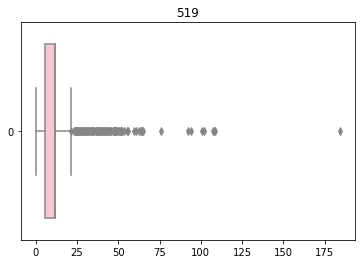

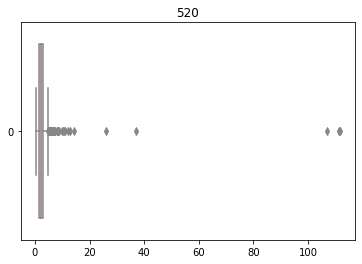

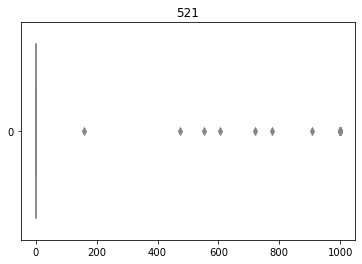

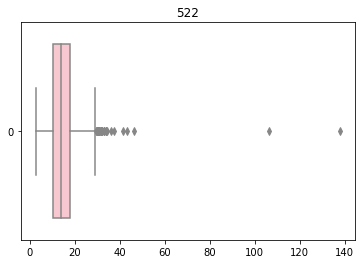

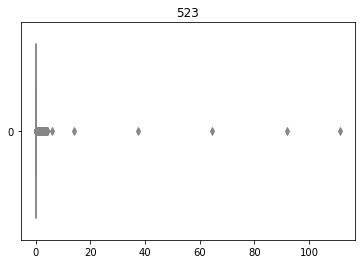

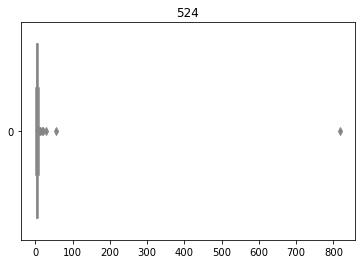

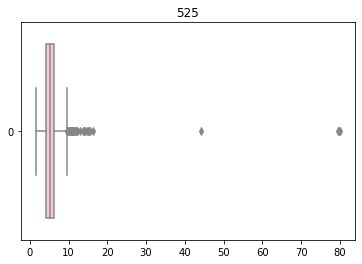

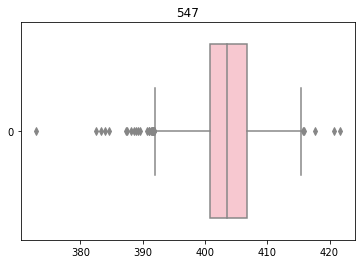

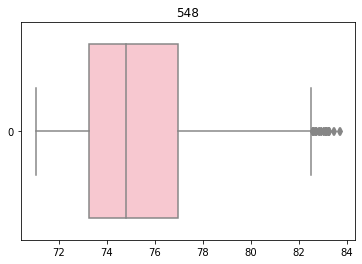

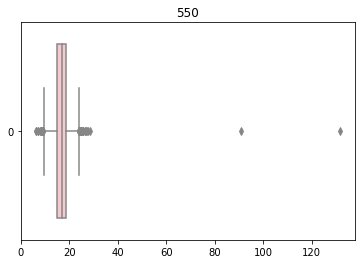

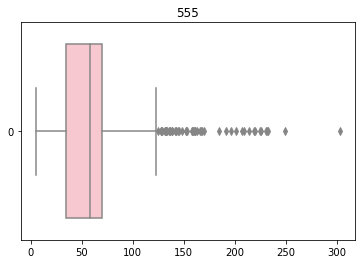

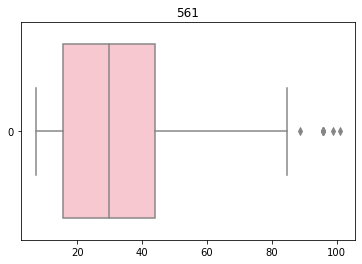

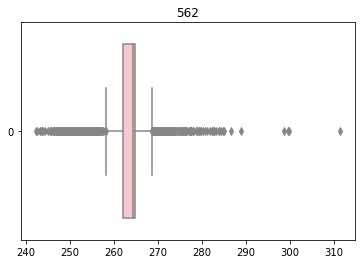

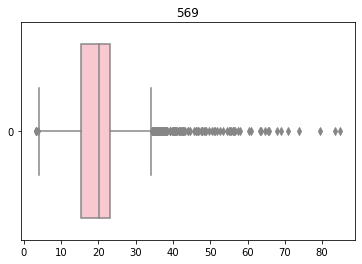

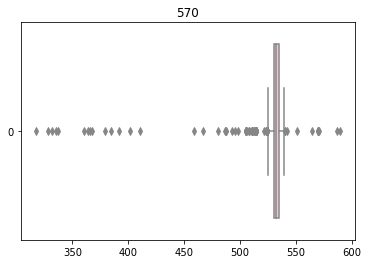

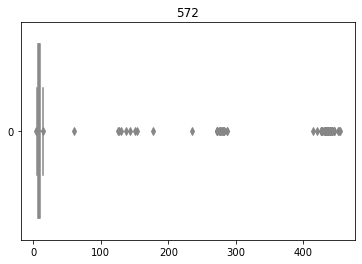

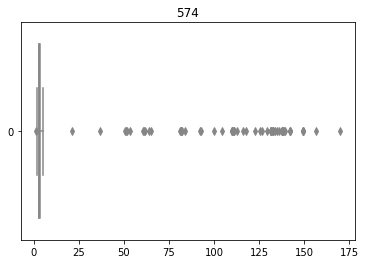

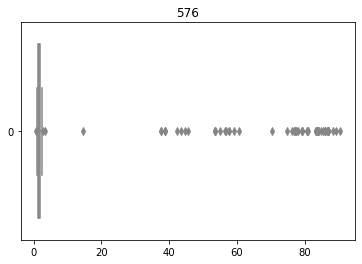

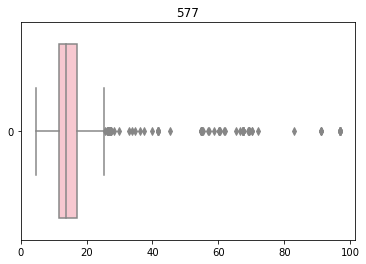

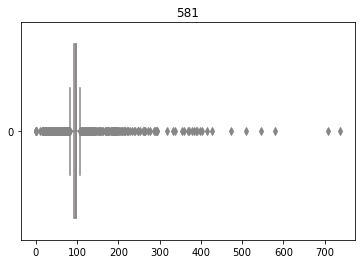

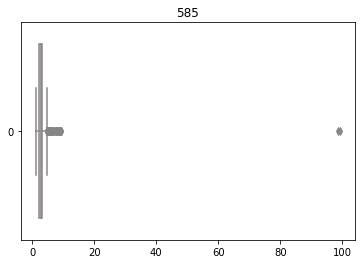

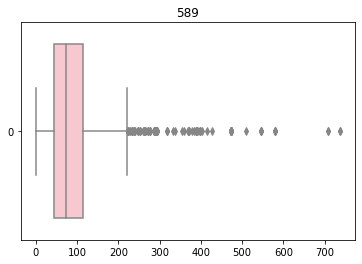

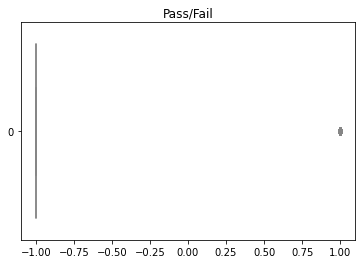

In [21]:
#Lets check for the outliers in thh dataset
for columns in Data.columns:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = Data[columns], orient="h" , color = 'pink')

Since we have Outliers present in almost all the columns, changing all the values to adjust outliers in all the columns will 
change the entire data set.
ALso, we have features with only negative values, hence taking log transformation will result in undifined values (NAN).
Hence in this data set, we will prefer keeping data set untouched w.r.t outliers, (However with agreement with SME, we can still choose to take care of outliers)

In [22]:
#for correlation, closer the value to 1, higher is the corelation betwen two features
Data.corr()

0         1         2         3         4         6  \
0          1.000000 -0.143840  0.004756 -0.007613 -0.011014  0.002270   
1         -0.143840  1.000000  0.005767 -0.007568 -0.001636 -0.025564   
2          0.004756  0.005767  1.000000  0.298935  0.095891 -0.136225   
3         -0.007613 -0.007568  0.298935  1.000000 -0.058483 -0.685835   
4         -0.011014 -0.001636  0.095891 -0.058483  1.000000 -0.074368   
6          0.002270 -0.025564 -0.136225 -0.685835 -0.074368  1.000000   
12         0.010368  0.034062  0.018326 -0.028223 -0.002707  0.058982   
15         0.030675 -0.087315  0.006115 -0.013157  0.011435  0.039815   
21        -0.011075  0.058155  0.044468  0.021111  0.008353 -0.021131   
22         0.032206 -0.052664 -0.029830 -0.033141 -0.007773  0.035590   
23        -0.046678 -0.016047  0.009276 -0.007973  0.004969  0.013043   
24        -0.014921 -0.060066 -0.021149 -0.049605 -0.013636  0.057480   
28         0.054548 -0.022847 -0.061725  0.096876  0.007753 -0.107400   
40        -0.009150  0.027101 -0.014761 -0.006463  0.025844  0.014575   
43        -0.050244 -0.019848  0.050536 -0.023326 -0.012074  0.011003   
45         0.015586  0.017935  0.005874 -0.031329  0.057947  0.029945   
46        -0.006066  0.007923  0.010206 -0.043089  0.047234  0.030622   
48         0.004240  0.005573 -0.096163 -0.021524 -0.028014  0.026156   
50        -0.019867  0.004888 -0.008547 -0.056539  0.029248  0.048818   
51        -0.050817  0.022586 -0.016448 -0.012499  0.006774  0.053057   
55        -0.024957  0.017092 -0.008088 -0.016235 -0.052408  0.013190   
59        -0.105184  0.007505  0.039710 -0.020691 -0.020577  0.057800   
60        -0.036578 -0.035006  0.039177 -0.025746 -0.008334  0.017097   
62         0.008042 -0.013760 -0.013211 -0.007548  0.049400  0.053272   
63        -0.045524  0.038595 -0.028692 -0.032560 -0.004640  0.030469   
64        -0.017521  0.058949  0.007603 -0.026986  0.002791 -0.020330   
65        -0.019591  0.054413  0.014053 -0.028134  0.006155 -0.003449   
66        -0.000433 -0.020000  0.001573 -0.027224  0.045359  0.037892   
67        -0.023074  0.002643 -0.013251  0.009517 -0.002948  0.017830   
68         0.033390  0.018941 -0.022889  0.017397 -0.016026 -0.054700   
70        -0.001325 -0.026117  0.002973 -0.015267  0.032287  0.034194   
71        -0.000247 -0.018276  0.053692  0.083641  0.037397 -0.098829   
72        -0.003495 -0.012443  0.008350 -0.002320  0.004717  0.009504   
73         0.008029 -0.001506 -0.003914  0.009338 -0.002216 -0.003609   
88        -0.029554 -0.007194  0.000507 -0.016283 -0.006984  0.042190   
90         0.012107  0.019660  0.040394 -0.007633 -0.013718 -0.004335   
115        0.023283  0.029167  0.039054 -0.002689  0.012677 -0.024270   
117       -0.000732 -0.009297  0.021111  0.037765 -0.004841 -0.035948   
133       -0.007950 -0.034737 -0.015685  0.000703 -0.047460 -0.014152   
135       -0.070572  0.051456 -0.010705  0.051198 -0.020532 -0.034496   
136        0.157770 -0.031967  0.051600  0.021363  0.010716 -0.025010   
137        0.160297 -0.113532  0.047842 -0.006539  0.004287  0.006138   
138       -0.021708 -0.030106  0.272222 -0.206134  0.193495  0.192320   
139        0.001720  0.009966  0.021581  0.299731  0.006466 -0.418355   
140       -0.011107 -0.001786  0.095947 -0.059719  0.999975 -0.073462   
142       -0.007485  0.028495  0.006404 -0.073778  0.667794 -0.160978   
148        0.000533  0.001703  0.015360  0.008853  0.000583  0.018170   
150        0.006545 -0.044156  0.003297 -0.045914 -0.034916  0.079507   
151       -0.014213 -0.097923  0.003101 -0.005321 -0.002010 -0.010553   
152        0.003507 -0.004628  0.018247  0.007937 -0.001580  0.027789   
154       -0.009449  0.018289  0.008429  0.013438  0.006871 -0.003361   
159       -0.037011  0.037930  0.015631 -0.051199 -0.001934  0.045314   
160       -0.003787  0.029999  0.012170 -0.076747 -0.002558  0.055111   
161        0.014089  0.037932 -0.031203 -0.010054 -0.017138 -0.009556   
162

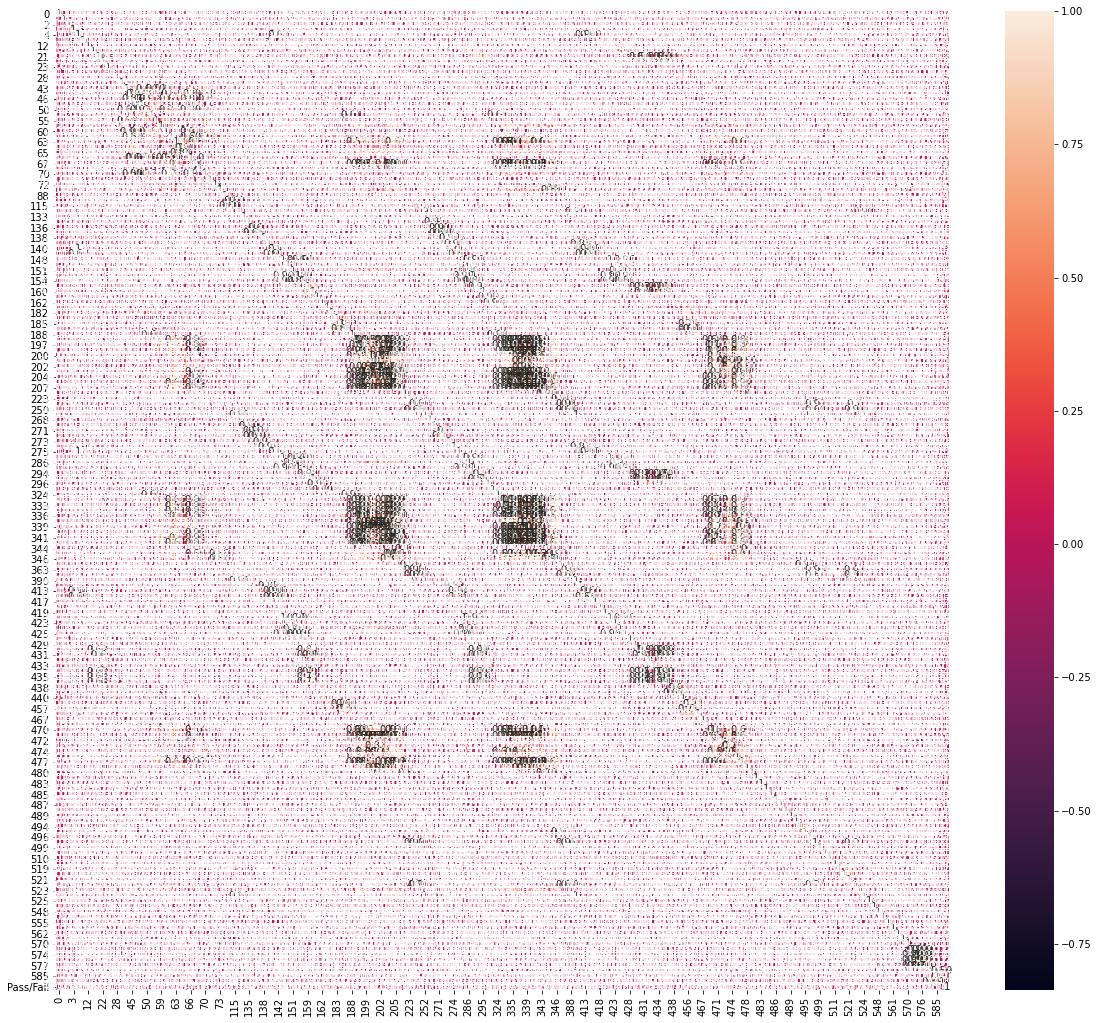

In [23]:
#Visualize the above correlation using heat map
plt.figure(figsize = (20,18))
sns.heatmap(Data.corr(), annot = True)

In [24]:
# Since highly correlated columns can help building the model in same way, we can drop on of the two highly corelated column 
corr_matrix = Data.corr()
iters = range(len(corr_matrix.columns) - 1)
drop_cols = []

 # Iterate through the correlation matrix and compare correlations
for i in iters:
    for j in range(i-1):
        if i != 0:
            item = abs(corr_matrix.iloc[i, j])
            col = corr_matrix.columns[i]
            row = corr_matrix.index[j]
            # If correlation exceeds the threshold
            if item >= 0.90:
                # Print the correlated features and the correlation value
                print('Columns', col,'and column', row, 'are highly correlated with',item,'ratio')
                drop_cols.append(col)

print ('\nColumns with high correlations which can be dropped are:\n', np.unique(drop_cols))
                


Columns 50 and column 46 are highly correlated with 0.9044818259166801 ratio
Columns 70 and column 66 are highly correlated with 0.9044609903388564 ratio
Columns 140 and column 4 are highly correlated with 0.9999751247610721 ratio
Columns 152 and column 148 are highly correlated with 0.9910694582650661 ratio
Columns 154 and column 148 are highly correlated with 0.9396050560127642 ratio
Columns 199 and column 196 are highly correlated with 0.9419809272931734 ratio
Columns 204 and column 67 are highly correlated with 0.9022307064188807 ratio
Columns 207 and column 196 are highly correlated with 0.9167918615124543 ratio
Columns 252 and column 117 are highly correlated with 0.9861933657838743 ratio
Columns 270 and column 135 are highly correlated with 0.9464739349956607 ratio
Columns 271 and column 136 are highly correlated with 0.9712649283173527 ratio
Columns 272 and column 137 are highly correlated with 0.9768378109004264 ratio
Columns 273 and column 138 are highly correlated with 0.919

In [25]:
print ('As per above correlation calculation, we can further drop', len(np.unique(drop_cols)), 'number of features')
drop_cols_temp = np.unique(drop_cols)
drop_cols_temp

As per above correlation calculation, we can further drop 53 number of features


array(['140', '152', '154', '199', '204', '207', '252', '270', '271',
       '272', '273', '274', '275', '283', '286', '287', '294', '295',
       '296', '297', '324', '332', '333', '335', '336', '338', '339',
       '340', '341', '343', '344', '361', '363', '388', '390', '413',
       '415', '421', '424', '425', '434', '435', '436', '457', '471',
       '477', '495', '497', '50', '522', '524', '576', '70'], dtype='<U3')

In [26]:
print ('shape of the Data set before dropping highly correlated features is', Data.shape)
for i in drop_cols_temp:
    del Data[i]

print ('shape of the Data set after dropping highly correlated features is', Data.shape)

shape of the Data set before dropping highly correlated features is (1567, 183)
shape of the Data set after dropping highly correlated features is (1567, 130)


In [27]:
new_corr_matrix = Data.corr()
new_corr_matrix.tail(1)
#From below, we can see that out of all the columns, column number  21,59, 430,431, 510 has a little better correlation with Pass/Fal column

0         1         2         3         4         6  \
Pass/Fail -0.025141 -0.002603 -0.000957 -0.024623 -0.013756  0.016239   

                 12        15        21       22        23        24  \
Pass/Fail -0.005969 -0.002884  0.107997 -0.07338  0.012873 -0.018297   

                 28        40       43        45        46        48  \
Pass/Fail -0.106767 -0.051763 -0.02047  0.008347 -0.009413 -0.015267   

                 51        55        59        60        62        63  \
Pass/Fail  0.006005 -0.008948  0.155771 -0.018342 -0.019012  0.059912   

                 64        65        66        67        68       71  \
Pass/Fail  0.076551  0.054817 -0.039026  0.039532 -0.052078 -0.00204   

                 72        73        88        90       115      117  \
Pass/Fail  0.006368 -0.016896  0.026865 -0.053476 -0.043654 -0.01672   

                133       135       136       137       138       139  \
Pass/Fail  0.067789 -0.027404  0.011298  0.029721  0.047551 -0.004781   

                142       148       150       151       159       160  \
Pass/Fail -0.015427 -0.005603 -0.012131 -0.022415  0.077873  0.089689   

                161       162       180       182       183       185  \
Pass/Fail -0.019509 -0.005804 -0.078648 -0.031269  0.055601 -0.009002   

                187       188       196       197       200       201  \
Pass/Fail  0.005704  0.047165  0.053376  0.055967  0.060595  0.028805   

                202       203       205       208       223       225  \
Pass/Fail  0.013425  0.045479  0.053645 -0.022763 -0.001068  0.019946   

                250       268      345       346       412       417  \
Pass/Fail  0.006964  0.006811 -0.00249 -0.002465  0.008378 -0.042632   

                418       419       423       428       429       430  \
Pass/Fail -0.030177  0.014251  0.047902 -0.026333  0.000275  0.109569   

                431       432       433       438       439       440  \
Pass/Fail  0.120304  0.004431  0.047553  0.015519 -0.020213 -0.007446   

                456       460       467       468       470       472     473  \
Pass/Fail  0.000862  0.060587  0.036375 -0.055426  0.038237  0.001219  0.0095   

                474       476       478       480       482       483  \
Pass/Fail  0.014789  0.028547 -0.006763 -0.011571 -0.009226 -0.023892   

                484       485       486       487       488       489  \
Pass/Fail -0.043752 -0.030856  0.025411 -0.011565 -0.046372  0.019338   

                490       494       496       499       500       510  \
Pass/Fail -0.006711  0.035182 -0.006456 -0.030051  0.014634  0.131587   

                511       519       520       521       523       525  \
Pass/Fail  0.054925  0.057574  0.007691  0.036722 -0.010401  0.011283   

                547       548       550      555       561       562  \
Pass/Fail  0.043849  0.008555  0.049021  0.02233  0.026177 -0.043051   

                569       570       572       574       577       581  \
Pass/Fail  0.045828 -0.001656 -0.032233 -0.034713 -0.049633 -0.013601   

                585       589  Pass/Fail  
Pass/Fail  0.005034 -0.002653        1.0

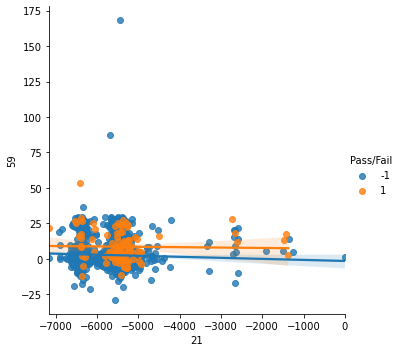

In [28]:
#Lets see bivariate analysis for above column with respect to Pass/Fail column
sns.lmplot(x='21',y='59',data = Data, hue = 'Pass/Fail')
# we can see the distribution of the pass and fail conductors is situated on extreme negative values of feature 21

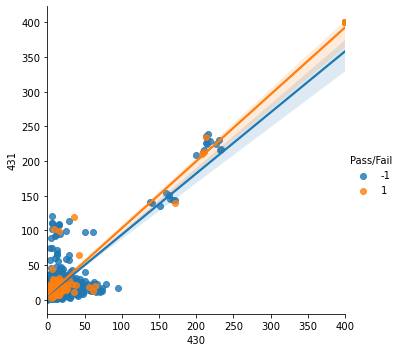

In [29]:
sns.lmplot(x='430',y='431',data = Data, hue = 'Pass/Fail')
#We can see a positive slope between 430 and 431 and distribution is mostly concentrated new 0

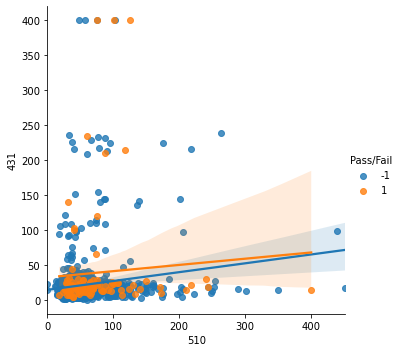

In [30]:
sns.lmplot(x='510',y='431',data = Data, hue = 'Pass/Fail')
# we can see that there are many outliers for feaure 510  

In [31]:
#Lets check the value counts for each Pass/Fail condutors
Data['Pass/Fail'].value_counts()
# we can see that data is highly imbalance, so we can try balancing it and then creating the models on same

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [32]:
# now that we have cleaned the data and visualized it, lets devide the data into training and testing samples
x = Data.drop(columns = ['Pass/Fail'])
y = Data['Pass/Fail']
x.shape , y.shape

((1567, 129), (1567,))

In [33]:
#Split into taining and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1096, 129), (471, 129), (1096,), (471,))

In [34]:
from imblearn.over_sampling import SMOTE

print("Before Upsampling, counts of label '-1': {}".format(sum(y_train==-1)))
print("Before Upsampling, counts of label '1': {} \n".format(sum(y_train==1)))

sm = SMOTE(k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())


print("After Upsampling, counts of label '-1': {}".format(sum(y_train_res==-1)))
print("After Upsampling, counts of label '1': {} \n".format(sum(y_train_res==1)))



print('After Upsampling, the shape of X_train_X: {}'.format(X_train_res.shape))
print('After Upsampling, the shape of Y_train: {} \n'.format(y_train_res.shape))

Before Upsampling, counts of label '-1': 1024
Before Upsampling, counts of label '1': 72 

After Upsampling, counts of label '-1': 1024
After Upsampling, counts of label '1': 1024 

After Upsampling, the shape of X_train_X: (2048, 129)
After Upsampling, the shape of Y_train: (2048,) 



In [35]:
# Lets build the lgistic model for above
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()
LR_model.fit(X_train_res,y_train_res)

# Prediction on of test data
y_pred = LR_model.predict(X_test)
LR_model_score = LR_model.score(X_test, y_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model on Original data is', LR_model_score*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, y_pred))


Accuracy of the Logistic regression model on Original data is 69.00212314225053


 Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.72      0.81       439
           1       0.07      0.28      0.11        32

    accuracy                           0.69       471
   macro avg       0.50      0.50      0.46       471
weighted avg       0.87      0.69      0.76       471



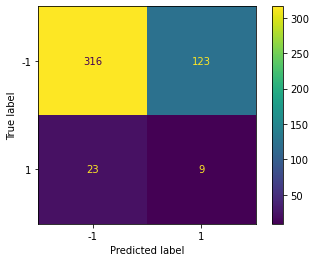

In [36]:
# Plotting confusion matrix
plot_confusion_matrix(LR_model,X_test,y_test)

# Explanation of Classification report:
Recall:<br>
Model predicted 316 cases correctly as semicondutor are passed while predicted 123 to be fail where as they were actually pass(this is Recall)<br>
Model predicted 23 cases incorrectly as semicondutor are pass where as they were fail and predicted 9 to be fail which are actually fail (this is Recall)

Precision:<br>
We can see that our model's precision in predicting Pass(-1) is 93% as it has rightly predicted 316 condutors as Pass out of (316+23) total number of pass conductors
and model's precision in predicting Fail(1) is 7% as it has incorrectly predicted 123 condutors as Fail out of (123+9) total number of Fail conductors

F1 score is the middle way / average of both Precision and Recall:
Hence our model's F1-score for Pass conductors is 81% and for Fail conductors is 11%

And lastly, Model's overall accuracy is 69%

In [37]:
# Lets  implement K fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=1)
model = LogisticRegression()
KFCV_results = cross_val_score(model, X_train_res, y_train_res, cv=kfold)
print('Accuracy for 10 folds is',KFCV_results)
print(" Overall Accuracy and its standard deviation is: %.3f%% (%.3f%%)" % (KFCV_results.mean()*100.0, KFCV_results.std()*100.0))

Accuracy for 10 folds is [0.70731707 0.67317073 0.60487805 0.66829268 0.72195122 0.71707317
 0.74634146 0.76585366 0.70098039 0.76470588]
 Overall Accuracy and its standard deviation is: 70.706% (4.666%)


In [38]:
#WE can assume that this after applying k fold cross validation our model is likely
# to perform with the accuracy of between 66% to 74 % in production

In [39]:
# Lets implement LeaveoneOut cross validation
from sklearn.model_selection import LeaveOneOut

LOOCV_results = cross_val_score(model, X_train_res, y_train_res, cv=LeaveOneOut())
print('Accuracy for leave one out CV is',LOOCV_results)
print(" Overall Accuracy and its standard deviation is: %.3f%% (%.3f%%)" % (LOOCV_results.mean()*100.0, LOOCV_results.std()*100.0))

Accuracy for leave one out CV is [1. 1. 1. ... 0. 1. 1.]
 Overall Accuracy and its standard deviation is: 76.074% (42.663%)


In [40]:
# Lets implement StratifiedKFold cross validation

from sklearn.model_selection  import StratifiedKFold
stratified_kfold_CV = StratifiedKFold(n_splits = 10, random_state = 1)
StatifiedKF_results = cross_val_score(model, X_train_res, y_train_res, cv = stratified_kfold_CV)
print('Accuracy for stratified kfold CV is',StatifiedKF_results)
print(" Overall Accuracy and its standard deviation is: %.3f%% (%.3f%%)" % (StatifiedKF_results.mean()*100.0, StatifiedKF_results.std()*100.0))

Accuracy for stratified kfold CV is [0.70731707 0.71707317 0.78536585 0.77073171 0.75121951 0.77560976
 0.74634146 0.7902439  0.7745098  0.76960784]
 Overall Accuracy and its standard deviation is: 75.880% (2.662%)


We can see that the best accuracy which is observed is with leave one out CV, however since it is time and resource consuming, we can consider Stratified k fold CV which is gives average accuracy of around 73% to 77%.

In [41]:
#Lets apply Gridsearch CV to find best hyper parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

LR_GSV = LogisticRegression()

# specify parameters and distributions to sample from
LR_GSV_param = {"penalty" : ['l1', 'l2', 'elasticnet', None],
              "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              "dual": [True, False]}

# run randomized search
samples = 10  # number of random samples 
randomCV = RandomizedSearchCV(LR_GSV, param_distributions=LR_GSV_param, n_iter=samples) #default cv = 3
randomCV.fit(X_train_res, y_train_res)
print('Parameters suggested as per random CV', randomCV.best_params_)

# run Grid search
grid_search = GridSearchCV(LR_GSV, param_grid=LR_GSV_param)
grid_search.fit(X_train_res, y_train_res)
print('Parameters suggested as per Grid search CV', grid_search.best_params_)

Parameters suggested as per random CV {'solver': 'sag', 'penalty': 'l2', 'dual': False}
Parameters suggested as per Grid search CV {'dual': False, 'penalty': 'l2', 'solver': 'newton-cg'}


Accuracy of the Logistic regression model on Original data is 80.89171974522293


 Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.85      0.89       439
           1       0.12      0.28      0.17        32

    accuracy                           0.81       471
   macro avg       0.53      0.56      0.53       471
weighted avg       0.89      0.81      0.84       471

Confusion matrix


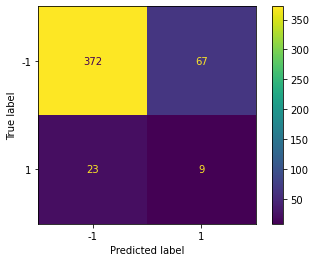

In [42]:
LR_GSV_1 = LogisticRegression(solver ='newton-cg', penalty = 'l2', dual =  False)
LR_GSV_1.fit(X_train_res,y_train_res)

# Prediction on of test data
y_pred = LR_GSV_1.predict(X_test)
LR_GSV_1_score = LR_GSV_1.score(X_test, y_test)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model on Original data is', LR_GSV_1_score*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test, y_pred))
# Plotting confusion matrix
print ('Confusion matrix')
plot_confusion_matrix(LR_GSV_1,X_test,y_test)

For solver ='lbfgs': Models performance is 69.02% and solver ='newton-cg': Models performance is 80.89% <br>
(Note: I have changed the solver value and noted the accuracy with solver ='lbfgs')

In [43]:
#lets try different techniques to get the best results
# standardise the training data by applying zscore
x_sc = x.apply(zscore)
x_sc.head()

0         1         2         3         4         6        12  \
0  0.224309  0.849725 -0.436273  0.033555 -0.050580 -0.563790  0.762960   
1  1.107136 -0.382910  1.017137  0.153067 -0.060045  0.198217  0.181365   
2 -1.114158  0.799102 -0.481289  0.686213 -0.047906 -0.906210  0.633372   
3 -0.350312 -0.198875 -0.051547 -1.106948 -0.051290  0.503246  0.581223   
4  0.242143  0.087526  1.117387 -0.158919 -0.047492 -0.115382  0.610171   

         15        21        22        23        24        28        40  \
0  0.103782  0.318407  0.735468 -0.172210  0.361942 -1.522972 -0.277120   
1  0.095858  0.282478 -0.322234  0.223050 -0.462653 -0.311560  0.433389   
2  0.210561  0.272497  0.008033 -0.174567 -0.557914 -0.684304 -2.242749   
3  0.535107  0.239761 -0.173190 -0.513983 -0.468515 -1.898926  0.376833   
4  0.436445  0.226986 -0.217226 -0.131415  0.143314 -1.927846  0.355468   

         43        45        46        48        51        55        59  \
0 -0.452853 -0.812566 -0.852092  0.277786  1.000167 -0.862453 -0.492923   
1 -0.528735 -0.455157 -0.727349  1.298783  0.784225 -0.123389 -0.226438   
2  1.418662 -0.629808  0.092052  0.246003  0.465399  3.105153  2.194423   
3  1.201850 -0.629808  0.016854  0.568516  0.533568  3.105153  2.252754   
4 -0.352913  5.044537  4.610835 -0.416695  1.250334  0.343388 -1.604435   

         60        62        63        64        65        66        67  \
0 -0.703759 -0.912878  0.303390  0.238540  0.338549 -1.112014 -0.051474   
1 -0.524040 -0.292963 -0.434592 -0.271798  0.070146 -0.816767 -0.050700   
2  1.559140 -0.101633 -0.378507 -0.879523 -0.401058  0.331202 -0.051647   
3  1.047336 -0.037229 -0.060581 -0.991231 -0.514988  0.322131 -0.051299   
4 -0.013001  3.196010  1.124845  2.367169  2.395718  3.357220 -0.051464   

         68        71            72            73        88        90  \
0  0.274977 -0.641197  2.202065e-15 -2.756181e-14 -1.124999 -0.399317   
1  1.638845 -0.695974  2.202065e-15 -2.756181e-14  2.313733 -1.079102   
2 -0.387078 -0.619387 -7.487774e-01  1.393693e+00 -2.278834  1.256492   
3  0.051274 -1.079763  7.716409e-01 -2.462267e-01 -1.041069 -1.595753   
4 -0.182947 -1.218682  2.202065e-15 -2.756181e-14  0.384333  0.479681   

        115       117       133       135       136       137       138  \
0  0.025089 -0.030126 -0.508797  0.087736 -0.500002 -0.911233 -0.928122   
1 -0.329673  0.006493 -0.910429 -0.347544 -1.076326 -0.799950 -0.114196   
2 -0.588677 -0.022382 -0.858902 -0.504244 -0.219277 -0.502556 -1.017646   
3 -0.782633  0.005798 -3.619030  0.157381 -0.375442  0.019322 -0.797894   
4  1.005673 -0.037036 -1.674469  0.018091  0.093053  0.007810 -0.716501   

        139       142       148       150       151       159       160  \
0 -0.252239  0.039159  0.202177 -0.785516 -0.121545  0.136767  0.716844   
1 -0.751798 -0.266339  0.206199 -0.163470 -0.031341 -0.320415 -0.864326   
2 -0.422569  0.477605 -0.010966 -0.616260 -0.181004 -0.326525  0.405138   
3 -0.970606 -0.320084  0.256042  0.697634  0.038549 -0.024112 -0.348879   
4 -0.459721 -0.849048  0.307867  0.676632 -0.049782 -0.187028 -0.474258   

        161       162       180       182       183       185       187  \
0 -0.708552 -0.676486  0.585204  0.410790 -1.456170 -0.229080 -0.784050   
1 -0.890126 -0.232181 -0.309186 -0.153925 -1.508133 -0.062045 -1.032759   
2 -0.781040 -0.411950 -0.372639  0.607839 -0.548787  0.256713 -0.007704   
3 -0.149663 -0.273877 -0.844007  0.934653 -0.600019 -0.233256  0.030648   
4 -0.547757 -0.512296 -1.140123  0.016691  1.618012 -0.471280  0.883699   

        188       196       197       200       201       202       203  \
0  1.020904 -0.210990  0.000692 -0.842151 -0.483037 -0.420311 -0.794544   
1  1.833098 -0.315577 -0.047747 -1.105172 -0.805146 -0.446433 -0.860664   
2  0.778808 -0.229484 -0.032550 -0.100386 -0.539995  0.060919 -0.427553   
3  0.431357 -0.176553  0.333121 -0.466077 -0.376977  0.083064 -0.330209   
4  1.333651 -0.202062 -0.411519  0.2503

# Lets reduce the dimensions using PCA

We can reduce dimensions using PCA by following below steps: <br> 
1. Calculate the covariance matrix.<br>
2. Calculate the eigenvectors and their eigenvalues.<br>
3. Sort the eigenvectors according to their eigenvalues in descending order.<br>
4. Choose the first K eigenvectors (where k is the dimension we'd like to end up with).<br>
5. Build new dataset with reduced dimensionality.
(For this particular module lets try implementing PCA manually, in the next modules we can straight away use PCA.fit_transform
funtion to reduce dimensions)

In [44]:
# Calculate the covariance matrix
cov_matrix = np.cov(x_sc.T)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)

cov_matrix shape: (129, 129)
Covariance_matrix [[ 1.00063857e+00 -1.43931658e-01  4.75868246e-03 ... -1.71312713e-02
   2.36043864e-02  4.17663212e-03]
 [-1.43931658e-01  1.00063857e+00  5.77088798e-03 ...  5.40409063e-02
   2.27405073e-03  4.48254521e-02]
 [ 4.75868246e-03  5.77088798e-03  1.00063857e+00 ... -7.05872633e-03
   1.57621501e-02 -3.29109770e-02]
 ...
 [-1.71312713e-02  5.40409063e-02 -7.05872633e-03 ...  1.00063857e+00
  -4.71262486e-04  5.85661312e-01]
 [ 2.36043864e-02  2.27405073e-03  1.57621501e-02 ... -4.71262486e-04
   1.00063857e+00 -3.80249376e-03]
 [ 4.17663212e-03  4.48254521e-02 -3.29109770e-02 ...  5.85661312e-01
  -3.80249376e-03  1.00063857e+00]]


In [45]:
#Calculating Eigen Vectors & Eigen Values:

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.01079434  0.03400482  0.0236541  ...  0.02264396  0.13738896
   0.03971213]
 [ 0.00086035 -0.01157146 -0.04057078 ... -0.19063241  0.19675594
  -0.08778818]
 [-0.007367   -0.00467633 -0.02219941 ...  0.00185485  0.01244536
  -0.00107696]
 ...
 [-0.00658125  0.02272129 -0.05324648 ...  0.01743134  0.08986486
   0.03622402]
 [ 0.00679145  0.00763494 -0.02008637 ... -0.13034193  0.05354158
  -0.05498246]
 [ 0.02523848  0.00175913 -0.04945522 ...  0.02804211  0.05842212
   0.05312988]]

 Eigen Values 
%s [9.49893989e+00 5.23201935e+00 4.64834800e+00 4.18673132e+00
 3.56295506e+00 3.37810472e+00 3.12345870e+00 2.89674025e+00
 2.72000651e+00 2.51900881e+00 2.28411495e+00 2.18189837e+00
 2.02664007e+00 2.00026471e+00 1.91469766e+00 1.83645407e+00
 1.79402083e+00 1.76711618e+00 1.71298676e+00 1.63450091e+00
 1.62291304e+00 1.53812380e+00 1.49349202e+00 1.47674953e+00
 1.43242788e+00 1.41945383e+00 1.37423738e+00 1.35481822e+00
 1.29826108e+00 1.25538723e+00 1.25190102e+0

In [46]:
#Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs:
eig_pairs = [(eigenvalues[i], eigenvectors[:,i]) for i in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.498939889577516, array([-1.07943385e-02,  8.60347823e-04, -7.36699964e-03, -8.67263362e-05,
        2.32333249e-03,  6.09987282e-03, -7.29962812e-03,  2.65589280e-02,
       -1.04009577e-02,  9.74364760e-03, -1.13800972e-02,  3.18999152e-03,
       -4.67133877e-04, -5.12040213e-03,  1.95403670e-02,  4.78906416e-02,
        5.37694841e-02, -1.37714779e-02,  2.09272951e-02,  1.15956203e-02,
        1.29666014e-01, -1.88266088e-02,  1.82670423e-01,  1.71921261e-01,
        4.63501681e-02,  1.11416946e-01,  3.19245835e-02,  2.67406421e-01,
       -1.35291133e-01, -2.06200355e-02, -7.63062129e-02,  1.42007304e-01,
       -4.90055702e-03, -6.78387430e-03,  1.93576464e-03, -2.79738631e-03,
       -2.32613986e-02,  5.13119293e-03, -2.05609629e-02, -2.79152016e-02,
       -1.53163061e-02,  9.14320625e-05,  3.18520868e-03,  1.64434698e-03,
       -4.69129433e-03,  6.66116574e-02, -1.21115536e-02, -9.96200336e-03,
       -4.73455990e-03, -9.65299957e-03,  8.04504124e-03,  5.77981174e-02,
    

In [47]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in eigvalues_sorted]  # an array of variance explained by each 
# eigen vector... there will be 129 entries as there are 129 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 129 entries with 129 th entry 
# cumulative reaching 100%


print('Cumulative Variance explained:\n' , cum_var_exp)

Cumulative Variance explained:
 [0.0735882  0.11412061 0.15013132 0.18256589 0.21016807 0.23633822
 0.26053562 0.28297664 0.30404851 0.32356325 0.34125827 0.35816141
 0.37386177 0.38935781 0.40419095 0.41841795 0.43231621 0.44600604
 0.45927654 0.471939   0.48451169 0.49642752 0.50799759 0.51943796
 0.53053496 0.54153146 0.55217766 0.56267343 0.57273105 0.58245652
 0.59215499 0.60144566 0.61067182 0.61973636 0.62867989 0.63755881
 0.64636504 0.6549321  0.66345809 0.67185889 0.68015981 0.68829214
 0.69632718 0.70416867 0.7119507  0.71966521 0.72723129 0.73469837
 0.74211072 0.74949468 0.75681198 0.7639987  0.77101123 0.7780155
 0.78494386 0.79179851 0.79850354 0.80517052 0.81172007 0.81817957
 0.82454563 0.83087668 0.8370908  0.84330452 0.84935109 0.85536787
 0.86130854 0.86709383 0.87275171 0.87828899 0.88373187 0.88896685
 0.89415355 0.89909935 0.90398964 0.90878951 0.91326346 0.9176059
 0.92172192 0.92573904 0.92965809 0.93343982 0.93716545 0.94081078
 0.94431292 0.94774817 0.9510925

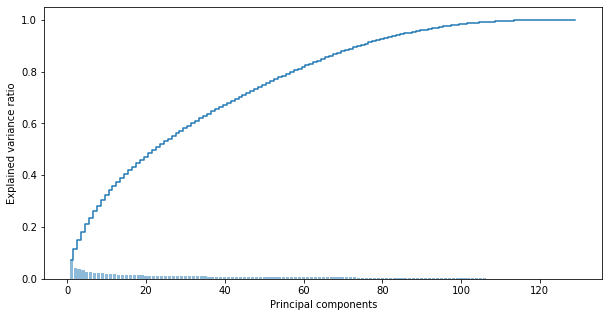

In [48]:
# Plotting the Explained variance and principal components
plt.figure(figsize=(10,5))
plt.bar(range(1,130), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,130),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

# From below we plot we can not see any particular elbow so lets try selecting number of dimensions based on the cumulative variance explained
# we can see that 75 features explain 90% of the data, so we will use first 75 principal components going forward and calulate the reduced dimensions.

In [49]:
# P_reduce represents reduced mathematical space....

x_reduce = np.array(eigvectors_sorted[0:75])   # Reducing from 129 to 75 dimension space

x_pca = np.dot(x_sc,x_reduce.T)   # projecting original data into principal component dimensions

x_reduced_pca = pd.DataFrame(x_pca)  # converting array to dataframe for pairplot

x_reduced_pca.head()

0         1         2         3         4         5         6  \
0 -1.163453 -2.396733  0.163554  0.431128 -0.291643 -1.054599  0.911534   
1 -1.545191 -1.744298  0.432179  0.378855 -0.183718 -1.421468  0.841136   
2  0.860045 -1.651834 -1.221206  2.390579  0.593729 -1.735366 -0.719669   
3  0.882356 -2.788030 -1.610578  4.655940 -2.106891 -3.046918 -1.481106   
4  1.645215  0.586966 -2.916893  6.848357 -0.287891  3.910116  4.339091   

          7         8         9        10        11        12        13  \
0 -0.054441  0.196146  0.252531 -0.328450 -0.676090  0.127875 -1.562120   
1 -0.487645 -0.078498  0.349606 -0.895909  0.660900 -1.229965 -0.988639   
2  1.419358 -1.838536 -1.390172 -0.428844 -0.834210 -0.439010  0.714487   
3  2.204595 -1.013725  1.142482 -0.711539  0.359093 -0.521430  3.022199   
4 -4.159801  2.497264 -0.248956 -0.483843  0.720155  2.048752  3.960142   

         14        15        16        17        18        19        20  \
0 -2.102059 -1.517571  0.521249 -0.886171 -1.267300 -0.278813 -1.618662   
1 -3.503881 -0.486649  1.745170 -2.271156  0.148130 -1.292155  0.297530   
2 -1.261344  0.879023  1.214892 -0.574733 -0.032666 -1.922532 -0.470613   
3 -4.156036 -0.139373  2.416940  1.022970  0.119292 -0.963635  1.609175   
4 -0.757799  2.215194  1.605159 -3.820181 -3.574692  0.189568 -0.753329   

         21        22        23        24        25        26        27  \
0  0.917258  0.955281 -1.286690 -0.027092 -0.697406 -0.222995  1.404850   
1  0.246258  0.353732  1.303990  0.279255 -2.386071  1.365830 -0.865122   
2  0.672419 -1.926182  1.059461 -0.143582  2.783651 -1.257360  1.053837   
3  0.911552 -1.536609  2.382004  2.289904  0.128736 -0.985622  2.985585   
4  0.762581  0.251675  4.069546 -1.438865 -0.826142  0.519724 -3.458778   

         28        29        30        31        32        33        34  \
0 -1.150182 -0.037549 -0.356038  0.321769  0.697939  1.714255  0.493094   
1 -1.248437 -0.876139 -1.141848 -0.665323  0.112224  1.797491  0.657309   
2  0.457986  1.791640  2.586380  0.082402  0.257790  1.653516  1.819283   
3  7.071971  4.800494 -3.579417 -4.415538 -3.338633  2.584572  2.992760   
4 -2.259994 -4.179893 -0.028555 -1.880137 -2.119496  6.756367 -1.145346   

         35        36        37        38        39        40        41  \
0 -0.353475 -0.703971 -0.181684  0.772531  0.318199  0.034142  1.011521   
1 -0.569923  1.200862  1.056545 -0.061525 -0.629477 -0.036881 -0.339568   
2  1.734753 -1.572411 -0.824989  0.964750 -0.173618 -1.692548  0.054716   
3 -3.359439  7.321620 -1.604284  0.382782  6.859341 -8.374694 -2.556433   
4  6.882802  7.321450  0.391154  4.918356  7.431908 -1.824904  7.144568   

         42         43        44        45        46        47        48  \
0 -1.101945  -1.726825  0.896541  0.272611 -0.359435 -0.035249  0.834872   
1  1.372847  -0.260934 -0.338792 -0.183522  0.430305 -0.640051  1.164547   
2 -0.366977  -1.029313  1.052382 -0.603086  0.909156 -2.641156 -0.267543   
3 -2.034077   0.718443  3.790040  6.091768  0.899226  7.192738 -0.658418   
4 -0.079447  10.735411 -2.646822 -2.554352  2.262293  2.369519 -2.962687   

         49        50        51        52        53        54        55  \
0  2.013943 -0.701044 -0.102662  0.697089  0.352842  0.038590  0.264686   
1 -0.804323 -0.245761 -0.682826 -0.819494  0.608515  0.447998  0.196643   
2  1.334477 -1.591412  0.111139 -1.018543 -1.131141 -0.886501 -0.400448   
3 -2.436175  5.199513  4.092708  1.319333 -3.052296 -0.682244  3.110848   
4  2.446161 -7.411788  0.536720  2.274107  1.012001  2.876127 -5.577185   

         56        57        58        59        60        61        62  \
0  0.897474  0.713379 -0.197127 -0.824293 -1.100915 -1.135701  0.912250   
1  0.343539 -0.894908 -0.397173  1.070460  0.864844  0.592388  0.841974   
2  0.867028 -0.120111 -3.325047 -0.810216  0.622516  1.366869 -1.204378   
3 -0.042547  5.313440 -3.446089  2.394313  0.649692 -0.301269  3.792983   
4 -3.735778 -1.741377

In [50]:
#Split into taining and testing data
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(x_reduced_pca, y, test_size=0.30, random_state=1)
X_train_sc.shape, X_test_sc.shape, y_train_sc.shape, y_test_sc.shape

((1096, 75), (471, 75), (1096,), (471,))

In [51]:
# Lets upsample the dataset to balance 
print("Before Upsampling, counts of label '-1': {}".format(sum(y_train_sc==-1)))
print("Before Upsampling, counts of label '1': {} \n".format(sum(y_train_sc==1)))

sm = SMOTE(k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_sc_res, y_train_sc_res = sm.fit_sample(X_train_sc, y_train_sc.ravel())


print("After Upsampling, counts of label '-1': {}".format(sum(y_train_sc_res==-1)))
print("After Upsampling, counts of label '1': {} \n".format(sum(y_train_sc_res==1)))



print('After Upsampling, the shape of X_train_X: {}'.format(X_train_sc_res.shape))
print('After Upsampling, the shape of Y_train: {} \n'.format(y_train_sc_res.shape))

Before Upsampling, counts of label '-1': 1024
Before Upsampling, counts of label '1': 72 

After Upsampling, counts of label '-1': 1024
After Upsampling, counts of label '1': 1024 

After Upsampling, the shape of X_train_X: (2048, 75)
After Upsampling, the shape of Y_train: (2048,) 



Accuracy of the Logistic regression model on Original data is 75.3715498938429


 Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.78      0.86       439
           1       0.10      0.34      0.16        32

    accuracy                           0.75       471
   macro avg       0.52      0.56      0.51       471
weighted avg       0.89      0.75      0.81       471



 Confusion Matrix:


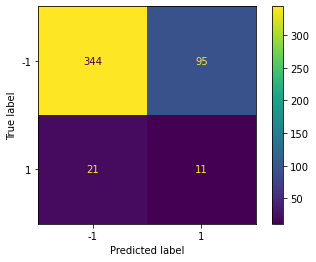

In [52]:
#Lets see if the performance of our model is increased or not


LR_model1 = LogisticRegression()
LR_model1.fit(X_train_sc_res,y_train_sc_res)

# Prediction on of test data
y_pred = LR_model1.predict(X_test_sc)
LR_model1_score = LR_model1.score(X_test_sc, y_test_sc)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the Logistic regression model on Original data is', LR_model1_score*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test_sc, y_pred))
print('\n\n Confusion Matrix:')
print(plot_confusion_matrix(LR_model1,X_test_sc,y_test_sc))


Models overall accuracy have increased from 69% to 75%
we can see that F1 score is increased by 5% for both -1 and 1 classes of prediction.
Also as explained earlier, Precision nd recall for estimating -1 and 1 type of semi conductors have increased.

We can see that by using above techniques we have clearly increased out model's performance


In [53]:
# lets see if the performance of the mode changes when we change the sample population 
# We will create a method which will take independent variables, target variables and 2 ratios 
# based on which we will create 2 samples and run the model on both sample sets and see if the performance is changed 

from sklearn.pipeline import Pipeline 


def diff_sample_test (x,y,sample_ratio1,sample_ratio2):
    print ('shape of X and Y data set before applying enhancement is',x.shape,y.shape,'respectively')
    sm = SMOTE(k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
    xsm,ysm = sm.fit_sample(x, y.ravel())
    
    xtrain1,xtest1,ytrain1,ytest1 = train_test_split(xsm,ysm,test_size = sample_ratio1 , random_state = 42)    
    xtrain2,xtest2,ytrain2,ytest2 = train_test_split(x,y,test_size = sample_ratio2 , random_state = 42)
    
    pipe_lr1 = Pipeline([('scl', StandardScaler()),('pca', PCA()), ('clf', LogisticRegression())]) 
    pipe_lr1.fit(xtrain1, ytrain1)
    print ('\n\n\nDetails of samples with', sample_ratio1,'ratio\n')
    print ('size of x train, y train, x test and y test samples is',xtrain1.shape,ytrain1.shape,xtest1.shape,ytest1.shape, 'respectively')
    print('Test Accuracy for above sample is: %.3f' % pipe_lr1.score(xtest1, ytest1))
    
    pipe_lr2 = Pipeline([('scl', StandardScaler()), ('pca', PCA()),('clf1', LogisticRegression())]) 
    pipe_lr2.fit(xtrain2, ytrain2) 
    print ('\n\n\nDetails of samples with', sample_ratio2,'ratio\n')
    print ('size of x train, y train, x test and y test samples is',xtrain2.shape,ytrain2.shape,xtest2.shape,ytest2.shape ,'respectively')
    print('Test Accuracy for above sample is: %.3f' % pipe_lr2.score(xtest2, ytest2))


In [54]:
diff_sample_test (x,y,0.20,0.90)
# We can see even with changing the sample sizes models performance is quite good,
# certainly scaling and dimension reduction enhances the data resulting in better model performances 

shape of X and Y data set before applying enhancement is (1567, 129) (1567,) respectively



Details of samples with 0.2 ratio

size of x train, y train, x test and y test samples is (2340, 129) (2340,) (586, 129) (586,) respectively
Test Accuracy for above sample is: 0.840



Details of samples with 0.9 ratio

size of x train, y train, x test and y test samples is (156, 129) (156,) (1411, 129) (1411,) respectively
Test Accuracy for above sample is: 0.899




Accuracy of the  GaussianNB() model is 53.71549893842887

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.54      0.68       439
           1       0.07      0.50      0.13        32

    accuracy                           0.54       471
   macro avg       0.51      0.52      0.41       471
weighted avg       0.88      0.54      0.65       471


 Confusion Matrix:


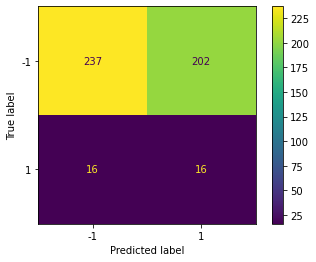



Accuracy of the  DecisionTreeClassifier() model is 77.07006369426752

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.81      0.87       439
           1       0.09      0.25      0.13        32

    accuracy                           0.77       471
   macro avg       0.51      0.53      0.50       471
weighted avg       0.88      0.77      0.82       471


 Confusion Matrix:


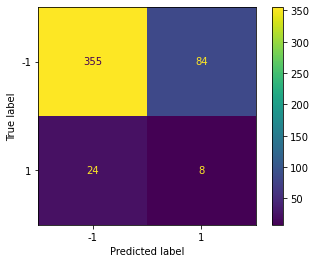



Accuracy of the  KNeighborsClassifier() model is 45.22292993630573

Classification Report:
              precision    recall  f1-score   support

          -1       0.96      0.43      0.59       439
           1       0.09      0.78      0.16        32

    accuracy                           0.45       471
   macro avg       0.53      0.60      0.38       471
weighted avg       0.90      0.45      0.56       471


 Confusion Matrix:


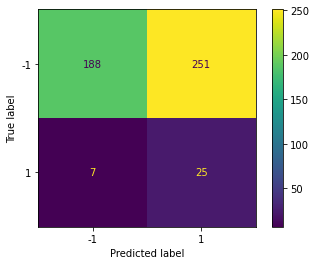



Accuracy of the  SVC() model is 93.41825902335457

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      1.00      0.97       439
           1       0.60      0.09      0.16        32

    accuracy                           0.93       471
   macro avg       0.77      0.54      0.56       471
weighted avg       0.91      0.93      0.91       471


 Confusion Matrix:


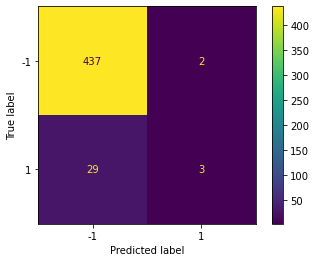



Accuracy of the  RandomForestClassifier() model is 92.1443736730361

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.99      0.96       439
           1       0.14      0.03      0.05        32

    accuracy                           0.92       471
   macro avg       0.54      0.51      0.51       471
weighted avg       0.88      0.92      0.90       471


 Confusion Matrix:


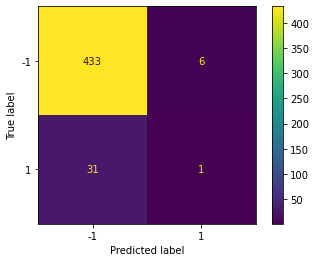



Accuracy of the  BaggingClassifier() model is 87.04883227176221

Classification Report:
              precision    recall  f1-score   support

          -1       0.93      0.93      0.93       439
           1       0.06      0.06      0.06        32

    accuracy                           0.87       471
   macro avg       0.50      0.50      0.50       471
weighted avg       0.87      0.87      0.87       471


 Confusion Matrix:


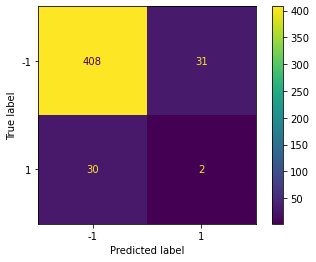



Accuracy of the  AdaBoostClassifier() model is 80.67940552016985

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.84      0.89       439
           1       0.13      0.31      0.18        32

    accuracy                           0.81       471
   macro avg       0.54      0.58      0.54       471
weighted avg       0.89      0.81      0.84       471


 Confusion Matrix:


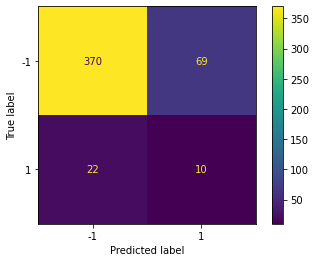



Accuracy of the  GradientBoostingClassifier() model is 86.62420382165605

Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.92      0.93       439
           1       0.12      0.16      0.14        32

    accuracy                           0.87       471
   macro avg       0.53      0.54      0.53       471
weighted avg       0.88      0.87      0.87       471


 Confusion Matrix:


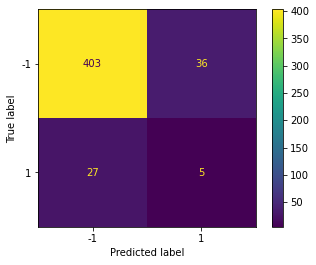

In [55]:
# Lets try using all the models and find the best one for our data set
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

models = []
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RandomForestClassifier', RandomForestClassifier()))
models.append(('BaggingClassifier', BaggingClassifier()))
models.append(('AdaBoostClassifier', AdaBoostClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))

Accuracy = []
recall = []
MName = []

for name, model in models:
    #stratified_kfold_CV_all = StratifiedKFold(n_splits = 10, random_state = 1)
    #StatifiedKF_results_all = cross_val_score(model, X_train_sc_res,y_train_sc_res, cv = stratified_kfold_CV)
    name = model.fit(X_train_sc_res,y_train_sc_res)
    #results.append(StatifiedKF_results_all)
    #names.append(name)
    #print("%s: %f (%f)" % (name, StatifiedKF_results_all.mean(), StatifiedKF_results_all.std()))
    # Prediction on of test data
    y_pred = name.predict(X_test_sc)
    score = name.score(X_test_sc, y_test_sc)
    Accuracy.append(score)
    MName.append(str(name))
    recall.append(metrics.recall_score(y_test_sc, y_pred))
    

# Let's measure the accuracy of this model's prediction
    print('\n\nAccuracy of the ', name,'model is', score*100)
#We can see that models performance is increased due to scaled values
    print('\nClassification Report:')
    print(metrics.classification_report(y_test_sc, y_pred))
    print('\n Confusion Matrix:')
    cm = plot_confusion_matrix(name,X_test_sc,y_test_sc)
    print (cm)
    plt.show()
    



                     Model_Name  Accuracy   Recall
0                  GaussianNB()  0.537155  0.50000
1      DecisionTreeClassifier()  0.770701  0.25000
2        KNeighborsClassifier()  0.452229  0.78125
3                         SVC()  0.934183  0.09375
4      RandomForestClassifier()  0.921444  0.03125
5           BaggingClassifier()  0.870488  0.06250
6          AdaBoostClassifier()  0.806794  0.31250
7  GradientBoostingClassifier()  0.866242  0.15625


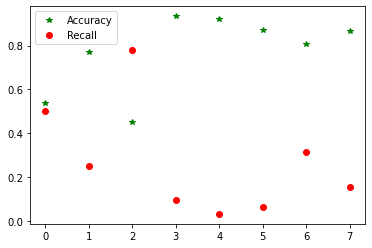

In [56]:
df = pd.DataFrame()
df['Model_Name'] = MName
df['Accuracy'] = Accuracy
df['Recall'] = recall
print (df)
plt.plot(Accuracy,'g*', label = 'Accuracy')
plt.plot(recall,'ro', label = 'Recall')
plt.legend()
plt.show()

We can see that SVC, RandomForestClassifier, BaggingClassifier,AdaBoostClassifier and GradientBoostingClassifier performs better with Accuracy more than 80%, however when it comes in inferencing how much conductors will fail KNN model is out performing all other models.

Hence with agreement with SME, 
If the agreement is for having highest accuracy in predicting correct conductors we can choose SVC model 
and if the agreement is for having a model which will prioritize identitfying fail conductors against identifying pass conductors, we will choose KNN model

So lets search for the best hyper parameter for above two models and see if the performance is enhanced or not



In [57]:
# Lets define hyper parameter 
# specify parameters and distributions to sample from
SVC_param = {"kernel" : ['linear', 'poly', 'rbf', 'sigmoid'],
              "gamma" : ['scale', 'auto']}

# run Grid search
grid_search = GridSearchCV(SVC(), param_grid=SVC_param)
grid_search.fit(X_train_sc_res,y_train_sc_res)
print('Parameters suggested for SVC as per Grid search CV', grid_search.best_params_)
print('Accuracy for best SVC as per Grid search CV', grid_search.best_score_)

Parameters suggested for SVC as per Grid search CV {'gamma': 'auto', 'kernel': 'rbf'}
Accuracy for best SVC as per Grid search CV 0.9921855805355119


In [58]:
KNN_param = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }

# run Grid search
knn_grid_search = GridSearchCV(KNeighborsClassifier(), param_grid=KNN_param)
knn_grid_search.fit(X_train_sc_res,y_train_sc_res)
print('Parameters suggested for Random Forest as per Grid search CV', knn_grid_search.best_params_)
print('Accuracy for best Random Forest as per Grid search CV', knn_grid_search.best_score_)


Parameters suggested for Random Forest as per Grid search CV {'algorithm': 'auto', 'n_neighbors': 2}
Accuracy for best Random Forest as per Grid search CV 0.8193464130240324


So we have best hyper parameters for both SVC and KNN models<br>
Lets create both models individually and check the classificaiton report respectively for the future data set

Accuracy of the SVC model is 93.20594479830149


 Classification Report:
              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.50      0.03      0.06        32

    accuracy                           0.93       471
   macro avg       0.72      0.51      0.51       471
weighted avg       0.90      0.93      0.90       471



 Confusion Matrix:


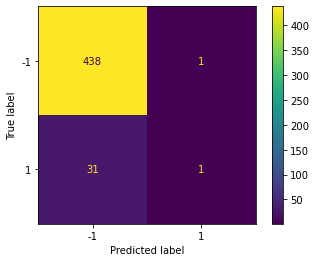

In [59]:
supersvc = SVC(gamma= 'auto', kernel= 'rbf')
supersvc.fit(X_train_sc_res,y_train_sc_res)

# Prediction on of test data
y_pred = supersvc.predict(X_test_sc)
supersvc_score = supersvc.score(X_test_sc, y_test_sc)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the SVC model is', supersvc_score*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test_sc, y_pred))
print('\n\n Confusion Matrix:')
print(plot_confusion_matrix(supersvc,X_test_sc,y_test_sc))

Accuracy of the KNN model is 66.45435244161358


 Classification Report:
              precision    recall  f1-score   support

          -1       0.94      0.69      0.79       439
           1       0.08      0.38      0.13        32

    accuracy                           0.66       471
   macro avg       0.51      0.53      0.46       471
weighted avg       0.88      0.66      0.75       471



 Confusion Matrix:


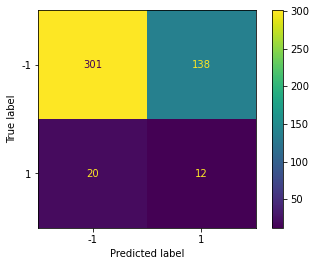

In [60]:
super_KNN = KNeighborsClassifier(algorithm= 'auto', n_neighbors =2)
super_KNN.fit(X_train_sc_res,y_train_sc_res)

# Prediction on of test data
y_pred = super_KNN.predict(X_test_sc)
super_KNN_score = super_KNN.score(X_test_sc, y_test_sc)

# Let's measure the accuracy of this model's prediction
print('Accuracy of the KNN model is', super_KNN_score*100)
#We can see that models performance is increased due to scaled values
print('\n\n Classification Report:')
print(metrics.classification_report(y_test_sc, y_pred))
print('\n\n Confusion Matrix:')
print(plot_confusion_matrix(super_KNN,X_test_sc,y_test_sc))

We can see that performance of SVC even after searching the best hyper parameters is maintained to 93%.
However, performance for KNN model with hyper tuning is reduced w.r.t its prime motive of predicting fail conductors, hence we can choose not to hypertune KNN model and use it in automode completely.

Importing Future data set and predicting target variable for this data set

In [75]:
future_data = pd.read_excel('Future_predictions.xlsx')

In [76]:
future_data.shape

(18, 591)

In [77]:
future_data.isnull().sum().sum()

520

In [78]:
future_x = future_data.drop(labels = 'Time', axis = 1)

In [79]:
# Reducing to top 75 supporting features

RFmodel = RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= None)
RFmodel.fit(x,y)
RFmodel.feature_importances_

array([0.01250188, 0.00454851, 0.01183385, 0.00427229, 0.00749766,
       0.00578184, 0.00845835, 0.00474512, 0.01213856, 0.00758788,
       0.00650453, 0.00616132, 0.00598408, 0.01353885, 0.00610327,
       0.00707871, 0.00343864, 0.00950082, 0.01052765, 0.00760384,
       0.02825403, 0.00658387, 0.00812971, 0.01224884, 0.02043785,
       0.01813056, 0.0055625 , 0.0125629 , 0.00728728, 0.01048659,
       0.00788983, 0.00682033, 0.0106956 , 0.00562919, 0.00750529,
       0.00726998, 0.0049119 , 0.00681966, 0.00515747, 0.00533573,
       0.00882911, 0.00745891, 0.00389374, 0.00842129, 0.00625526,
       0.00405232, 0.01011734, 0.00671884, 0.00498824, 0.00489368,
       0.00731516, 0.0040101 , 0.00473903, 0.00693572, 0.00580328,
       0.00771801, 0.00839137, 0.0105377 , 0.00905314, 0.0065213 ,
       0.00662652, 0.00977543, 0.01106865, 0.00597724, 0.00789563,
       0.00913616, 0.00619166, 0.00755363, 0.00768448, 0.00591651,
       0.00536885, 0.00777953, 0.00517977, 0.00354475, 0.01054

In [80]:
imp_features = np.argsort(RFmodel.feature_importances_)[0:84]
future_x_reduced = future_x[imp_features]
future_x_reduced.head()

93      112      16        73   97      106  42        51        45   \
0 -0.0001     NaN  10.0433       NaN    0  0.0000   70  218.3174  130.3691   
1  0.0000     NaN   9.2599       NaN    0  0.0000   70  205.1695  133.1727   
2 -0.0013  0.4684   9.3144  485.2665    0  0.0013   70  185.7574  131.8027   
3 -0.0021  0.4647   9.6924  464.9735    0  0.0021   70  189.9079  131.8027   
4 -0.0001     NaN  10.3387       NaN    0  0.0000   70  233.5491  176.3136   

         3    109    126     102      1         115     91   52      7    49   \
0  1411.1265  NaN  3.353  0.1350  2564.00  748.6115 -0.3274    0  0.1242    1   
1  1463.6606  NaN  2.771 -0.0752  2465.14  731.2517  0.1455    0  0.1247    1   
2  1698.0172  NaN  3.094  0.0134  2559.94  718.5777  0.0553    0  0.1241    1   
3   909.7926  NaN  2.480 -0.0699  2479.90  709.0867  0.0697    0  0.1217    1   
4  1326.5200  NaN  3.027  0.0696  2502.87  796.5950  0.0448    0  0.1235    1   

       36     128     82        48      116        88       38        72   \
0  49.3830  3.188 -0.0044  141.2282  0.9908  1747.6049  86.9555       NaN   
1  49.3404  3.272  0.0017  145.8445  0.9902  1931.6464  87.5241       NaN   
2  49.8470  3.272  0.0287  141.0845  0.9899  1685.8514  84.7327  140.6972   
3  49.4900  3.119  0.0277  142.5427  0.9906  1752.0968  86.6867  160.3210   
4  49.7520  3.299 -0.0048  138.0882  0.9908  1828.3846  86.1468       NaN   

        39        70      26      33     122     95   5    114    54      79   \
0  117.5132  608.1700  1.7730  9.5126  2.639  0.0003  100    0  4.841 -0.0083   
1  118.1188  620.3582  2.0143  9.7997  2.541  0.0001  100    0  4.842 -0.0358   
2  118.6128  625.9636  2.0295  8.6590  2.882  0.0002  100    0  4.748 -0.0054   
3  117.0442  625.2945  2.0038  8.6789  3.132  0.0002  100    0  4.748  0.0676   
4  121.4364  645.7636  1.9912  8.7677  3.148 -0.0001  100    0  4.894  0.0034   

      98   69       63      96        12      89      75       14      11   \
0  0.3974    1  16.1445 -0.2786  202.4396  0.1841  0.0126   7.9558  0.9455   
1 -0.9353    1  10.9036  0.5854  200.5470  0.1874 -0.0039  10.1548  0.9627   
2 -0.1427    1  11.3019 -0.1343  202.0179  0.1497 -0.0078   9.5157  0.9615   
3  0.0177    1  13.5597  0.0411  201.8482  0.1958 -0.0555   9.6052  0.9629   
4 -0.6704    1  21.9782  0.2189  201.9424  0.1829 -0.0534  10.5661  0.9569   

      87        66      99       44      107     10       59   110      21   \
0  0.9690  693.7724 -0.0251  10.1841 -0.2468 -0.0034  -1.7264  NaN -5419.00   
1  0.9894  697.1964 -0.0158  10.0373  0.0772 -0.0148   0.8073  NaN -5441.50   
2  0.9880  710.5095  0.1218   9.8783 -0.0301  0.0013  23.8245  NaN -5447.75   
3  0.9904  710.4043 -0.0195   9.9305 -0.0483 -0.0033  24.3791  NaN -5468.25   
4  0.9902  745.6025 -0.0167  10.4091 -0.0799 -0.0072 -12.2945  NaN -5476.25   

        60      105     47      100     83       37      31     53        15   \
0  350.9264  0.0056  1.3072  0.0002  7.2163  66.3141  3.5191  4.592  414.8710   
1  352.0073  0.0015  1.2887 -0.0004  6.8043  64.9193  3.4171  4.590  414.7347   
2  364.5364 -0.0006  1.2992  0.0006  7.1041  65.8389  3.5986  4.486  416.7075   
3  361.4582  0.0003  1.3027 -0.0002  7.5925  65.1951  3.3813  4.486  422.2894   
4  355.0809  0.0078  1.0341  0.0004  7.5017  66.1542  3.2728  4.624  420.5925   

       35       28        50      101    41      4        34      67      9    \
0  64.2588  64.2333  624.3145  0.0002  4.515  1.3602  50.6170  0.9226  0.0162   
1  64.2828  68.4222  631.2618 -0.0004  2.773  0.8294  50.6596  1.1598 -0.0005   
2  64.1114  67.1333  637.2655 -0.0001  5.434  1.5102  50.1530  0.8694  0.0041   
3  64.1125  62.9333  637.3727  0.0000  1.279  1.3204  50.5100  0.9761 -0.0124   
4  64.1511  62.8333  667.7418 -0.0003  2.209  1.5334  50.2480  0.9256 -0.0031   

       19        68      94    55      127      71      86      30       64   \
0  12.5190  148.6009  0.0001  2834  0.4098  84.0793  2.3895  0.1632  21.7264   
1  12.4608  154.3709 -

In [81]:
future_x_reduced.describe().T

count         mean          std        min          25%         50%  \
93    18.0    -0.000883     0.001360    -0.0033    -0.001800    -0.00085   
112   11.0     0.464391     0.004575     0.4564     0.461150     0.46470   
16    18.0     9.738322     0.387699     9.1999     9.436200     9.69850   
73     8.0   469.437937     6.680888   464.2860   465.804650   468.06705   
97    18.0     0.000000     0.000000     0.0000     0.000000     0.00000   
106   18.0     0.000933     0.001272    -0.0019     0.000000     0.00085   
42    18.0    70.000000     0.000000    70.0000    70.000000    70.00000   
51    18.0   190.206028    45.206035   112.7524   152.852575   198.06390   
45    18.0   139.672172    11.478393   120.2818   132.552300   139.79000   
3     18.0  1200.046806   255.818978   877.6266  1004.469200  1152.30130   
109    0.0          NaN          NaN        NaN          NaN         NaN   
126   18.0     2.800000     0.214799     2.4800     2.645000     2.77050   
102   18.0     0.020028     0.061977    -0.0752    -0.010250     0.00910   
1     18.0  2526.248889    70.409195  2428.3700  2479.525000  2523.53000   
115   18.0   742.226317    42.219709   636.9547   726.798325   748.32585   
91    18.0    -0.027594     0.115585    -0.3274    -0.091900    -0.00500   
52    18.0     0.000000     0.000000     0.0000     0.000000     0.00000   
7     18.0     0.122056     0.002388     0.1185     0.119950     0.12230   
49    18.0     1.000000     0.000000     1.0000     1.000000     1.00000   
36    18.0    49.628617     0.186347    49.3404    49.495175    49.55155   
128   18.0     3.280167     0.101508     3.1190     3.207000     3.27200   
82    18.0     0.011356     0.031623    -0.1003     0.001025     0.02405   
48    18.0   139.389994     3.023645   136.0836   137.266150   138.15270   
116   18.0     0.988294     0.006531     0.9692     0.990200     0.99055   
88    18.0  1773.365767    75.059770  1632.3120  1720.881125  1764.71245   
38    18.0    86.740378     0.946658    84.7327    86.447825    86.74930   
72     8.0   157.012075     9.026895   140.6972   151.653225   158.88595   
39    18.0   118.255900     1.757665   116.5360   117.137900   117.63820   
70    18.0   627.287767    10.565195   608.1700   619.602050   626.75225   
26    18.0     1.667467     0.468792     0.4390     1.770000     1.78010   
33    18.0     9.064589     0.420413     8.5762     8.691400     8.96300   
122   18.0     2.806500     0.362844     2.2700     2.549500     2.77150   
95    18.0     0.000128     0.000102    -0.0001     0.000100     0.00015   
5     18.0   100.000000     0.000000   100.0000   100.000000   100.00000   
114   18.0     0.000000     0.000000     0.0000     0.000000     0.00000   
54    18.0     4.854056     0.068076     4.7480     4.814250     4.86800   
79    18.0     0.005017     0.031852    -0.0423    -0.007575     0.00000   
98    18.0    -0.111244     0.406094    -0.9353    -0.216500    -0.10710   
69    18.0     1.000000     0.000000     1.0000     1.000000     1.00000   
63    18.0    11.059100     4.154847     5.5936     8.108725    10.56545   
96    18.0     0.036689     0.202023    -0.3062    -0.044325     0.02935   
12    18.0   201.648722     6.842171   192.9787   200.490750   201.98015   
89    18.0     0.325056     0.402583     0.1497     0.172900     0.19045   
75    18.0    -0.010433     0.020641    -0.0555    -0.017800    -0.00970   
14    18.0    10.437922     1.684240     7.9558     9.210225     9.88440   
11    18.0     0.955267     0.008500     0.9433     0.946150     0.95865   
87    18.0     0.981283     0.010189     0.9642     0.969125     0.98815   
66    18.0   714.938828    14.263917   693.7724   704.799750   712.57435   
99    18.0     0.008739     0.045102    -0.0419    -0.018800    -0.00510   
44    18.0     9.959256     0.202864     9.7235     9.793700     9.91795   
107   18.0    -0.038622     0.112880    -0.2601    -0.072000    -0.02260   
10    18.0    -0.001594     0.008882    -0.0154    -0

In [82]:
# We can see that many columns have too many null values, so columns which have null values more than 70% can be droppped
# as majority of the data is missing imputing and creating majority of the artificial data is of no use in above case
# SO columns having null values more than roughly 1000 can be dropped
counter  = 0

for columns in future_x_reduced.columns:
    if future_x_reduced[columns].isnull().sum() >= 15:
        counter = counter + 1
        print( columns , 'Column has', future_x_reduced[columns].isnull().sum() , ' null values, hence can be dropped')
        del future_x_reduced[columns]
        

print('New shape of the data set after deleting above', counter ,' columns is', future_x_reduced.shape)

109 Column has 18  null values, hence can be dropped
110 Column has 18  null values, hence can be dropped
New shape of the data set after deleting above 2  columns is (18, 82)


In [83]:
counter  = 0
for columns in future_x_reduced.columns:
    if future_x_reduced[columns].min() == future_x_reduced[columns].median() and future_x_reduced[columns].max() == future_x_reduced[columns].median():
        counter = counter + 1
        print( columns , 'Column has single value ', future_x_reduced[columns].median(), ', hence can be dropped')
        del future_x_reduced[columns]
        

print('New shape of the data set after deleting above', counter ,' columns is', future_x_reduced.shape)

97 Column has single value  0.0 , hence can be dropped
42 Column has single value  70.0 , hence can be dropped
52 Column has single value  0.0 , hence can be dropped
49 Column has single value  1.0 , hence can be dropped
5 Column has single value  100.0 , hence can be dropped
114 Column has single value  0.0 , hence can be dropped
69 Column has single value  1.0 , hence can be dropped
New shape of the data set after deleting above 7  columns is (18, 75)


In [84]:
future_x_reduced.isnull().sum().sum()

27

In [85]:
# Since we do not really know much about each particular feature, we will fill the null values with the mean value 

#Replace blank valus with Nan values
future_x_reduced = future_x_reduced.replace('', np.nan)

#Replace the Null value with the mean value of each column
for columns in future_x_reduced.columns:
    mean = future_x_reduced[columns].mean()
    future_x_reduced[columns] = future_x_reduced[columns].fillna(mean)

In [86]:
future_x_reduced.isnull().sum().sum()

0

In [87]:
final_svc = SVC(gamma= 'auto', kernel= 'rbf')
final_svc.fit(X_train_sc_res,y_train_sc_res)
Future_PassFail_svc = final_svc.predict(future_x_reduced)
print ('Prediction on FUture data set with SVC model is\n',Future_PassFail_svc)

Prediction on FUture data set with SVC model is
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [88]:
final_KNN = KNeighborsClassifier()
final_KNN.fit(X_train_sc_res,y_train_sc_res)
Future_PassFail_knn = final_KNN.predict(future_x_reduced)
print('Prediction on Future data set with Random Forest model is\n',Future_PassFail_knn)

Prediction on Future data set with Random Forest model is
 [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


Conclusion and improvisation:
1. FirstlyBy using techiniques like Scaling and reducing dimensions based on the importance can enhance models performance
2. We can drop or clean data set using many techiniques like, low - variance columns, columns with high number of null values, columns with same valur in all rows PCA and Random forest
3. Different CV techniques can give us the ratio of the models performance based on which we can infer the range of model's performance in production
4. Grid search can give us best parameter of the model for enhancing its accuracy, however it can not always be help full as we saw in our data set, if the objective is to identify faulty condutors then we should use KNN on automode instead of best parameters.
5. As a part of improvisations high efforts should be made while collecting the data, Quality of the data is the topmost factor of data science, in our case we had too many null values, vague columns, 90% of the data have presence of outliers and most of all, target column is completely imbalance. Such data requires huge data manipulations which eventually tempers the original data. Hence probability of Model not performing well in production increases. 